# **Project Capstone Modul-2 : Analisis Data Penjualan Supermarket**

# Latar Belakang
Sebuah perusahaan yang bergerak dibidang supermarket, ingin mengerti kondisi penjualan berbagai produk mereka, mengukur efektifitas dari kampanye yang telah dilakukan selama ini, melihat efektifitas tempat pembelian yang disediakan oleh perusahaan, serta mencari profil customer yang loyal pada perusahan. BoD perusahaan ini mengharapkan adanya peningkatan revenue, dan marketing yang efisien untuk tahun-tahun berikutnya.

# Stakeholder

BoD dari Perusahaan Supermarket

## Pernyataan Masalah
Perusahaan ingin mengetahui Produk apa yang disukai pelanggan dan apa yang tidak berdasarkan karakteristik pelanggannya. Selain itu perusahaan juga ingin mengethaui strategi marketing yang jitu dan tepat guna, serta menentukan siapa yang harus diprioritaskan dalam menjalin hubungan dengan customer. 

Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:

- **Produk seperti apa yang disukai oleh pelanggan dan pelanggan seperti apa yang paling banyak berbelanja?**
- **Bagaimana performa marketing yang dilakukan dan strategi marketing seperti apa yang sebaiknya diterapkan untuk meningkatkan penjualan?**
- **Apakah tempat pembelian yang tersedia sudah cukup efektif? apa yang dapat dilakukan untuk meningkatkan penjualan?**
- **Siapa yang harus diprioritaskan untuk diberikan perlakuan spesial dari perusahaan agar mereka dapat menjadi pelanggan loyal?**

## **Data**

Untun menjawab permasalahan bisnis diatas, kita akan menganalisis data yang telah tersedia. Data dapat diakses [di sini]()

In [575]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import plotly.express as px
from scipy.stats import shapiro, chi2_contingency, kruskal


import warnings
warnings.filterwarnings("ignore")

Penjelasan dari tiap kolom yang ada pada dataset adalah sebagai berikut :

People
- ID: Pengenal pelanggan (Unik untuk setiap pelanggan)
- Year_Birth: Tahun kelahiran pelanggan
- Education: Jenjang Pendidikan terakhir pelanggan
- Marital_Status: Status Pernikahan Pelanggan
- Income: Pendapatan tahunan pelanggan
- Kidhome: Jumlah anak-anak di rumah pelanggan
- Teenhome: Jumlah remaja di rumah pelanggan
- Dt_Customer: Tanggal pelanggan terdaftar di supermarket ini
- Recency: Jumlah hari semenjak transaksi terakhir pelanggan
- Complain: 1 jika pelanggan pernah komplain dalam 2 tahun terakhir, 0 jika sebaliknya

Products
- MntWines: Total uang yang dikeluarkan untuk wine dalam 2 tahun terakhir
- MntFruits: Total uang yang dikeluarkan untuk buah dalam 2 tahun terakhir
- MntMeatProducts: Total uang yang dikeluarkan untuk produk daging dalam 2 tahun terakhir
- MntFishProducts: Total uang yang dikeluarkan untuk ikan dalam 2 tahun terakhir
- MntSweetProducts: Total uang yang dikeluarkan untuk makanan manis dalam 2 tahun terakhir
- MntGoldProds: ATotal uang yang dikeluarkan untuk emas dalam 2 tahun terakhir

Promotion
- NumDealsPurchases: Jumlah pembelian yang dilakukan dengan diskon
- AcceptedCmp1: 1 jika pelanggan menerima tawaran promo yang pertama, 0 jika tidak menerima
- AcceptedCmp2: 1 jika pelanggan menerima tawaran promo yang kedua, 0 jika tidak menerima
- AcceptedCmp3: 1 jika pelanggan menerima tawaran promo yang ketiga, 0 jika tidak menerima
- AcceptedCmp4: 1 jika pelanggan menerima tawaran promo yang keempat, 0 jika tidak menerima
- AcceptedCmp5: 1 jika pelanggan menerima tawaran promo yang kelima, 0 jika tidak menerima
- Response: 1 jika pelanggan menerima tawaran promo yang terakhir kali ditawarkan, 0 jika tidak menerima

Place
- NumWebPurchases: Jumlah transaksi yang dilakukan melalui website
- NumCatalogPurchases: Jumlah transaksi yang dilakukan melalui katalog
- NumStorePurchases: Jumlah transaksi yang dilakukan langsung ditoko
- NumWebVisitsMonth: Jumlah visit ke website perusahaan yang dilakukan oleh pelanggan satu bulan terakhir

In [576]:
df=pd.read_csv("Supermarket Customers.csv",delimiter='\t')
pd.set_option('display.max_columns',None)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


## **Data Understanding and Pre-processing**

In [577]:
# Menampilkan informasi pada dataset original
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [578]:
# menunjukkan statistik deskriptif 
display(df.describe(),df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [579]:
df.shape

(2240, 29)

Dari info diatas, dapat dilihat bahwa dataset original memiliki 28 kolom dan 2240 baris. Mayoritas dari data telah memiliki tipe data yang sesuai, kecuali pada kolom ID dan Dt_Customer, oleh karena itu sebelum melangkah ketahap selanjutnya, akan dilakukan casting pada kolom ID dan Dt_Customer

### **Casting kolom ID & Dt_Customer**

Pada data awal, kolom ID memiliki tipe data integer,  Dt_Customer merupakan data dengan format 'object', Sekarang akan coba dilakukan casting dari tipe 'object' menjadi 'date' agar dapat dilakukan analisis time series nantinya

In [580]:
df['ID'] = df['ID'].apply(str)
df['Dt_Customer']= pd.to_datetime(df['Dt_Customer'],dayfirst=True)

In [581]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   object        
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

Sekarang, tipe data pada setiap kolom sudah sesuai untuk menjalani proses selanjutnya

## **Pengecekan Data Duplikat**

In [582]:
df.duplicated().sum()

0

Saat dilakukan pengecakan terhadap data duplikat, `tidak ditemukan adanya data duplikat pada dataset`

## **Pengecekan Nilai Unik pada Setiap Kolom**

In [583]:
pd.set_option('display.max_colwidth', 1)
listUnik = []
for i in df.columns :
    listUnik.append( [i, df[i].nunique(), df[i].unique()])

DFUnique = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listUnik)
DFUnique

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[2012-09-04 00:00:00, 2014-03-08 00:00:00, 2013-08-21 00:00:00, 2014-02-10 00:00:00, 2014-01-19 00:00:00, 2013-09-09 00:00:00, 2012-11-13 00:00:00, 2013-05-08 00:00:00, 2013-06-06 00:00:00, 2014-03-13 00:00:00, 2013-11-15 00:00:00, 2012-10-10 00:00:00, 2012-11-24 00:00:00, 2012-12-24 00:00:00, 2012-08-31 00:00:00, 2013-03-28 00:00:00, 2012-11-03 00:00:00, 2012-08-08 00:00:00, 2013-01-06 00:00:00, 2012-12-23 00:00:00, 2014-01-11 00:00:00, 2013-03-18 00:00:00, 2013-01-02 00:00:00, 2013-05-27 00:00:00, 2013-02-20 00:00:00, 2013-05-31 00:00:00, 2013-11-22 00:00:00, 2014-05-22 00:00:00, 2013-05-11 00:00:00, 2012-10-29 00:00:00, 2013-08-29 00:00:00, 2013-12-31 00:00:00, 2013-09-02 00:00:00, 2014-02-11 00:00:00, 2013-02-01 00:00:00, 2013-04-29 00:00:00, 2013-03-12 00:00:00, 2013-11-05 00:00:00, 2013-10-02 00:00:00, 2014-06-28 00:00:00, 2012-11-09 00:00:00, 2013-05-24 00:00:00, 2014-01-01 00:00:00, 2012-11-08 00:00:00, 2014-05-12 00:00:00, 2012-08-11 00:00:00, 2014-06-07 00:00:00, 2013-06-12 00:00:00, 2012-11-19 00:00:00, 2013-04-02 00:00:00, 2014-04-28 00:00:00, 2013-06-17 00:00:00, 2014-03-03 00:00:00, 2013-07-04 00:00:00, 2012-09-07 00:00:00, 2013-02-18 00:00:00, 2013-06-11 00:00:00, 2013-12-06 00:00:00, 2013-05-21 00:00:00, 2014-05-11 00:00:00, 2014-03-19 00:00:00, 2013-09-27 00:00:00, 2013-04-08 00:00:00, 2012-09-11 00:00:00, 2012-09-14 00:00:00, 2013-03-17 00:00:00, 2013-04-05 00:00:00, 2014-04-30 00:00:00, 2012-12-19 00:00:00, 2012-08-27 00:00:00, 2012-10-12 00:00:00, 2013-09-04 00:00:00, 2012-08-29 00:00:00, 2013-06-23 00:00:00, 2013-07-03 00:00:00, 2014-02-25 00:00:00, 2013-08-11 00:00:00, 2013-07-16 00:00:00, 2014-05-28 00:00:00, 2014-01-21 00:00:00, 2014-05-27 00:00:00, 2013-11-23 00:00:00, 2014-03-23 00:00:00, 2014-05-24 00:00:00, 2012-11-22 00:00:00, 2013-04-11 00:00:00, 2013-12-01 00:00:00, 2013-06

Setelah melihat nilai unik pada setiap kolom, ditemukan adanya beberapa istilah yang tidak umum, yang akan dibahas satu persatu dibawah untuk melakukan reklasifikasi agar data menjadi lebih simple tanpa kehilangan makna dari istilah tersebut :

### **Education and Marital Status**

Dari data unik diatas, terdapat beberapa kolom yang memiliki nilai unik yang sebenarnya memiliki makna yang mirip, sehingga dapat diklasifikasikan menjadi satu kelas demi analisis yang lebih akurat, hal tersebut adalah :

- Education : Pada kolom education terdapat nilai 2n Cycle, yang dimana menurut salah satu [sumber](https://www.studera.nu/startpage/higher-education-studies/higher-education-in-sweden/study-levels-and-degrees/#:~:text=First%20cycle%20is%20for%20the,offered%20at%20all%20three%20cycles.), 2n Cycle berarti gelar master. Selain itu, pendidikan 'basic' merujuk pada orang-orang yang hanya menempuh pendidikan sampai SMA atau menempuh pendidikan informal menurut [sumber definisi basic education](https://uis.unesco.org/en/glossary-term/basic-education). Oleh karena itu, disini kita akan membuat satu kolom baru kolom baru 'Education_Level**', dimana 2 n cycle akan dikelompokkan menjadi master, dan basic akan diidentifikasi sebagai SMA (agar orang awam mengerti). Selain itu, jenjang pendidikan graduation akan ditukar dengan undergraduate agar tidak mengakibatkan kebingungan

- Marital_Status : Pada kolom ini, terdapat beberapa istilah yang kurang jelas seperti absurd dan yolo, dimana hal ini sebenarnya tidak termasuk dalam klasifikasi marital status. Tapi, kita dapat mengatakan bahwa orang yang mengisi marital status tersebut sebagai seorang single, karena jika mereka memiliki pasangan, harusnya mereka bisa mengisikan dengan together ataupun married. Selain itu, pada kolom ini juga terdapat status single dan alone yang sebenarnya memiliki makna yang sama, begitu juga dengan divorced dan widow, yang dimana maknanya sama-sama telah bercerai, sama halnya dengan married dan together yang maknanya sama-sama dalam pernikahan. Untuk membuat analisis yang lebih mengerucut, akan dibuat satu kolom baru 'Marital_Status**' yang hanya terdiri dari Single, Married, dan Divorced

In [584]:
df[df['Education']=='2n Cycle']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
19,2278,1985,2n Cycle,Single,33812.0,1,0,2012-11-03,86,4,17,19,30,24,39,2,2,1,3,6,0,0,0,0,0,0,3,11,0
37,10755,1976,2n Cycle,Married,23718.0,1,0,2013-09-02,76,6,3,14,15,7,36,3,3,1,2,7,0,0,0,0,0,0,3,11,0
46,9909,1996,2n Cycle,Married,7500.0,0,0,2012-11-09,24,3,18,14,15,22,50,3,3,1,3,9,0,0,0,0,0,0,3,11,1
67,9369,1979,2n Cycle,Single,88194.0,0,1,2014-03-19,19,688,14,309,201,24,38,1,11,10,10,5,1,0,0,1,0,0,3,11,1
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,8722,1957,2n Cycle,Married,82347.0,0,0,2012-11-06,38,556,54,845,202,133,63,1,7,7,10,3,1,0,0,1,0,0,3,11,1
2210,607,1955,2n Cycle,Divorced,41769.0,0,1,2013-02-13,31,302,29,131,32,0,27,6,8,1,7,8,0,0,0,0,0,0,3,11,0
2213,3661,1995,2n Cycle,Single,80617.0,0,0,2012-10-12,42,594,51,631,72,55,32,1,4,6,8,2,0,0,0,0,0,0,3,11,0
2222,10659,1979,2n Cycle,Together,7500.0,1,0,2013-05-07,7,2,8,11,3,8,21,4,3,2,2,7,0,0,0,0,0,0,3,11,0


In [585]:
df[(df['Marital_Status']=='Absurd') | (df['Marital_Status']=='YOLO')]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2093,7734,1993,Graduation,Absurd,79244.0,0,0,2012-12-19,58,471,102,125,212,61,245,1,4,10,7,1,0,0,1,1,0,0,3,11,1
2134,4369,1957,Master,Absurd,65487.0,0,0,2014-01-10,48,240,67,500,199,0,163,3,3,5,6,2,0,0,0,0,0,0,3,11,0
2177,492,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,3,11,0
2202,11133,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,3,11,1


In [586]:
def educationlevel (char) :
    if char == '2n Cycle' :
        return 'Master'
    elif char == 'Basic' :
        return 'Non-Graduate'
    elif char == 'Graduation' :
        return 'Undergraduate'
    else :
        return char

In [587]:
def maritalStatusSimp (char) :
    if char == 'Alone' :
        return 'Single'
    elif char == 'Together' :
        return 'Married'
    elif char == 'Widow' :
        return 'Divorced'
    elif char == 'Absurd' :
        return 'Single'
    elif char == 'YOLO' :
        return 'Single'
    else :
        return char
    

In [588]:
# Mengisi kolom Education Level* dan Marital_Status* disamping kolom original agar dapat dibandingkan dengan mudah
df['Education']=df['Education'].apply(educationlevel)
df['Marital_Status'] = df['Marital_Status'].apply(maritalStatusSimp)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Undergraduate,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Undergraduate,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Undergraduate,Married,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Undergraduate,Married,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Undergraduate,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Married,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Undergraduate,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Married,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


### **Klasifikasi Umur**

Agar kita dapat menganalisis data berdasarkan umur dari pelanggan, akan ditambahkan 1 kolom baru kolom ('Age'). Berdasarkan keterangan dari [sumber](https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign) berikut, kita mendapatkan informasi bahwa data tersebut diambil pada tahun 2014. Sehingga untuk perhitungan umur, kita akan menggunakan rumus 2014 - tahun kelahiran

In [589]:
# Membuat kolom baru yang berisi umur pelanggan
df.insert(2,'Age',df['Year_Birth'].apply(lambda x : 2014-x))
df

,ID,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,57,Undergraduate,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,60,Undergraduate,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,49,Undergraduate,Married,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,30,Undergraduate,Married,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,33,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,47,Undergraduate,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,68,PhD,Married,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,33,Undergraduate,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,58,Master,Married,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


Untuk mensimplifikasi klasifikasi pelanggan berdasarkan umur, dilakukan grouping dengan fungsi dibawah yang kemudian akan dimasukkan kedalam satu kolom baru yang bernama 'age range'

In [590]:
def rangeumur (int) :
    if int < 25 :
        return '15 - 25'
    elif 25 <= int <= 35 :
        return '25 - 35'
    elif 35 < int <= 45 :
        return '36 - 45'
    elif 45 < int <= 55 :
        return '46 - 55'
    elif 55 < int <= 65 :
        return '56 - 65' 
    else :
        return '> 75'

In [591]:
df.insert(3,'Age_Range',df['Age'].apply(rangeumur))
df

,ID,Year_Birth,Age,Age_Range,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,57,56 - 65,Undergraduate,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,60,56 - 65,Undergraduate,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,49,46 - 55,Undergraduate,Married,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,30,25 - 35,Undergraduate,Married,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,33,25 - 35,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,47,46 - 55,Undergraduate,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,68,> 75,PhD,Married,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,33,25 - 35,Undergraduate,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,58,56 - 65,Master,Married,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


## **Missing Value**

In [592]:
df.isna().sum()

ID                     0 
Year_Birth             0 
Age                    0 
Age_Range              0 
Education              0 
Marital_Status         0 
Income                 24
Kidhome                0 
Teenhome               0 
Dt_Customer            0 
Recency                0 
MntWines               0 
MntFruits              0 
MntMeatProducts        0 
MntFishProducts        0 
MntSweetProducts       0 
MntGoldProds           0 
NumDealsPurchases      0 
NumWebPurchases        0 
NumCatalogPurchases    0 
NumStorePurchases      0 
NumWebVisitsMonth      0 
AcceptedCmp3           0 
AcceptedCmp4           0 
AcceptedCmp5           0 
AcceptedCmp1           0 
AcceptedCmp2           0 
Complain               0 
Z_CostContact          0 
Z_Revenue              0 
Response               0 
dtype: int64

Dari data diatas, dapat dilihat bahwa haya satu kolom yang memiliki missing value, yaitu kolom 'Income'. Selanjutnya akan dilakukan handling missing value pada dataset

#### **Handling Missing Value pada Kolom Income**

In [593]:
df[df['Income'].isna()]

,ID,Year_Birth,Age,Age_Range,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,31,25 - 35,Undergraduate,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,28,25 - 35,Undergraduate,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,55,46 - 55,PhD,Single,NaN,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,63,56 - 65,Undergraduate,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,32,25 - 35,Undergraduate,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,41,36 - 45,Master,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,57,56 - 65,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,57,56 - 65,Undergraduate,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,41,36 - 45,Master,Married,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,53,46 - 55,PhD,Married,NaN,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


Untuk mengisi missing value pada income, mari coba melihat distribusi data income secara general

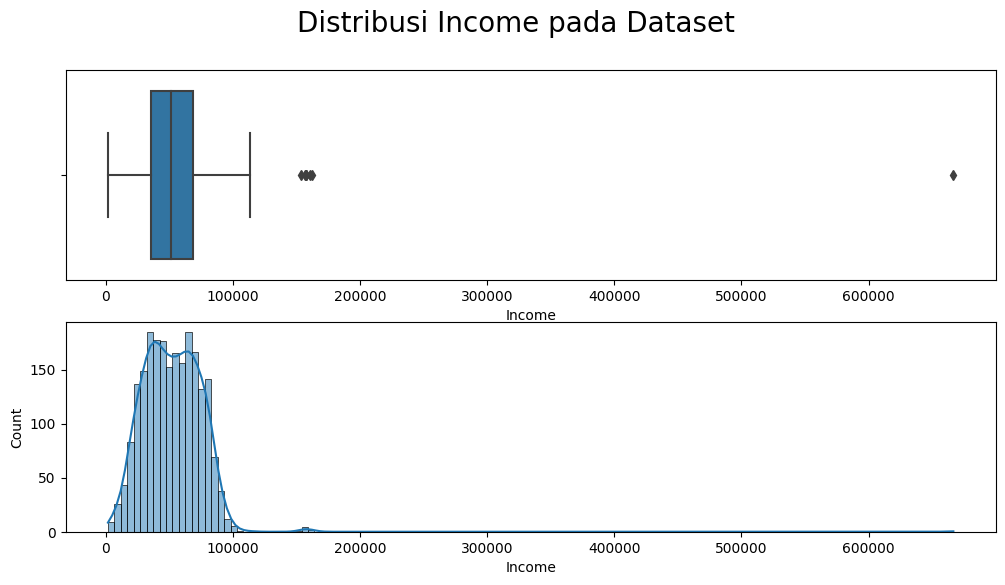

In [594]:
fig, axes = plt.subplots(nrows= 2, ncols= 1, figsize=(12,6))

sns.boxplot(data=df, x='Income',ax=axes[0])
sns.histplot(data=df, x='Income', ax=axes[1],kde=True)

fig.suptitle('Distribusi Income pada Dataset', size = 20)
plt.show()

In [595]:
df[df['Income']>200000]

,ID,Year_Birth,Age,Age_Range,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2233,9432,1977,37,36 - 45,Undergraduate,Married,666666.0,1,0,2013-06-02,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0


Dari sini dapat kita lihat bahwa terdapat satu data pencilan yang sangat jauh, dimana orang tersebut hanyalah lulusan S1 tp memiliki penghasilan 13 x lipat dari penghasilan rata-rata yang secara logika merupakan hal yang sangat aneh. Selain itu, dapat kita lihat bahwa user tersebut telah bergabung semenjak 2013 tapi jumlah transaksi yang cendrung minim sehingga tidak akan terlalu berpengaruh signifikan pada dataset (hanya 1/2240 = 0.044%). Oleh karena itu diputuskan untuk melakukan drop pada data tersebut 

In [596]:
df.shape

(2240, 31)

In [597]:
df=df.drop(index=2233)
df.shape

(2239, 31)

Setelah itu akan coba kita lihat lagi distribusi data income setelah menghilangkan data tersebut :

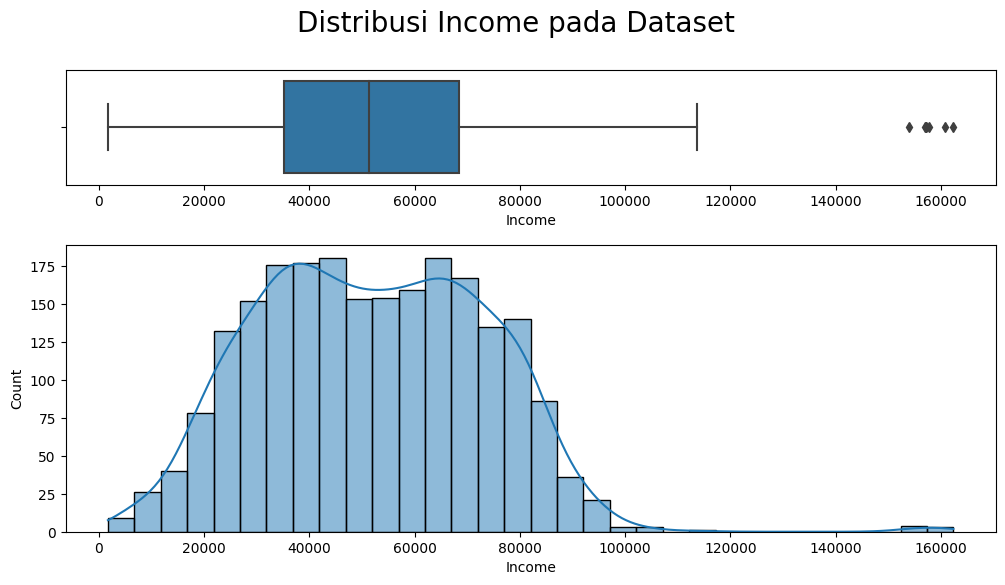

In [598]:
grid = {
    'height_ratios' : (4,10),
    'hspace' : 0.3} # perbandingan tinggi subplot 1 dan subplot 2

fig, [axes1,axes2] = plt.subplots(nrows= 2, ncols= 1, figsize=(12,6),gridspec_kw=grid)

sns.boxplot(data=df, x='Income',ax=axes1)
sns.histplot(data=df, x='Income', ax=axes2,kde=True)

fig.suptitle('Distribusi Income pada Dataset', size = 20)
plt.show()

In [599]:
df['Income'].skew()

0.34734967591402816

In [600]:
df['Income'].kurtosis()

0.7135488168867532

**Analisis Visual**

Dari Gambar Histogram, terlihat bahwa data income cendrung memiliki ekor yang lebih panjang disebelah kanan, hal itu juga dibuktikan oleh gambar boxplot yang memiliki outlier yang banyak disebelah kanan. Selain itu, hasil perhitungan skew juga menunjukkan bahwa grafik tersebut merupakan grafik positive skew atau right skew (skew > 0), dan grafiknya cendrung landai (kurtosis < 3). Dari hasil pengamatan tersebut, distribusi data dicurigai tidak normal, untuk lebih pastinya akan dilakukan tes normalitas dengan menggunakan saphiro test (karena pada jumlah data < 5000, metode saphiro cendrung lebih efektif)

**Uji Normalitas**

In [601]:
from scipy.stats import shapiro

In [602]:
stat, pvalue = shapiro(df['Income'].dropna()) # membuang data NaN saat melakukan test, karena jika tidak, hasil pvalue akan selalu 1
if pvalue > 0.05 :
    print(f'pvalue = {pvalue:.5f}, kita mengasumsikan data terdistribusi normal')  # :.5f untuk membulatkan 5 decimal
else :
    print(f'pvalue = {pvalue:.5f}, kita mengasumsikan data tidak terdistribusi normal')

pvalue = 0.00000, kita mengasumsikan data tidak terdistribusi normal


Dari hasil uji normalitas diatas, dapat kita simpulkan bahwa data tidak terdistribusi normal. Oleh karena itu, untuk pengisian missing value, kita akan menggunakan nilai median. Agar Pengisian missing value dapat lebih akurat, maka kita akan coba mengklasifikasikan income berdasarkan range umur dan tingkat pendidikan, kemudian mengisi nilai missing value dengan median income sesuai dengan range umur, jenjang pendidikannya, dan status pernikahannya. Berikut merupakan tabel median untuk setiap kelas range umur dan jenjang pendidikan :

In [603]:
dfMedianIncome=df.groupby(['Age_Range','Education','Marital_Status'])[['Income']].median()
dfMedianIncome

Income
Age_Range Education     Marital_Status         
15 - 25   Master        Married         24683.0
                        Single          86947.5
          Non-Graduate  Married         17256.0
                        Single          16185.0
          PhD           Married         68682.0
...                                         ...
> 75      PhD           Married         66110.5
                        Single          72437.5
          Undergraduate Divorced        63285.0
                        Married         69755.0
                        Single          84149.5

[64 rows x 1 columns]

Pengisian setiap missing value income dengan nilai median sesuai dengan range umur, edukasi, dan status pernikahannya :

In [604]:
# kondisi sebelum missing value diisi
df['Income'].isna().sum()

24

In [605]:
# Mengisi missing value sesuai median income dari tiap kriteria
for i in df[df['Income'].isna()].index :
    df['Income'][i] = dfMedianIncome.loc[[(df['Age_Range'][i],df['Education'][i],df['Marital_Status'][i])],'Income'].values

In [606]:
# kondisi setelah missing value diisi
df['Income'].isna().sum()

0

Sekarang, semua missing value pada kolom 'Income' telah terisi 

## **Feature Engineering**

Sebelum melangkah ke tahap analisis, ada tiga kolom tambahan yang akan diperlukan dalam analisis, yaitu data jumlah orang yang ada dirumah setiap customer. Untuk mendapatkannya, kita bisa memanfaatkan informasi dari kolom Marital_Status, Kidhome, dan Teenhome. Dimana People_Home merupakan penjumlahan dari ketiga kolom tersebut, tetapi untuk kolom Marital_Status, jika statusnya adalah single/divorced, maka nilainya 1, sedangkan jika statusnya married, maka nilainya 2. Selain itu kita juga akan menambahkan kolom total uang yang dibelanjakan oleh pelanggan dalam 2 tahun terakhir. Kolom itu akan diisi dengan penjumlahan spent untuk setiap produk yang ada pada dataset. Untuk kolom terakhir, akan ditambahkan kolom Promo_Taken dimana kolom ini berfungsi untuk melihat apakah suatu customer pernah mengikuti promo apapun atau tidak

### **Penambahan kolom 'People_Home'**

In [607]:
df.insert(9,'People_Home',df['Marital_Status'].apply(lambda x : 2 if x == 'Married' else 1)+df['Kidhome']+df['Teenhome'])
df.head(4)

,ID,Year_Birth,Age,Age_Range,Education,Marital_Status,Income,Kidhome,Teenhome,People_Home,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,57,56 - 65,Undergraduate,Single,58138.0,0,0,1,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,60,56 - 65,Undergraduate,Single,46344.0,1,1,3,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,49,46 - 55,Undergraduate,Married,71613.0,0,0,2,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,30,25 - 35,Undergraduate,Married,26646.0,1,0,3,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0


Sekarang, sudah ada kolom People_Home yang akan digunakan untuk analisis nantinya

### **Penambahan kolom 'Total_Spent'**

In [608]:
df.insert(17,'Total_Spent',df['MntWines']+df['MntMeatProducts']+df['MntMeatProducts']+df['MntSweetProducts']+df['MntGoldProds'])
df.head(4)

,ID,Year_Birth,Age,Age_Range,Education,Marital_Status,Income,Kidhome,Teenhome,People_Home,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,Total_Spent,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,57,56 - 65,Undergraduate,Single,58138.0,0,0,1,2012-09-04,58,635,88,546,172,88,1903,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,60,56 - 65,Undergraduate,Single,46344.0,1,1,3,2014-03-08,38,11,1,6,2,1,30,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,49,46 - 55,Undergraduate,Married,71613.0,0,0,2,2013-08-21,26,426,49,127,111,21,743,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,30,25 - 35,Undergraduate,Married,26646.0,1,0,3,2014-02-10,26,11,4,20,10,3,59,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0


### **Penambahan kolom 'Promo Taken'**

In [609]:
df['Promo_Taken'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']

Sekarang, sudah ada kolom Promo_Taken yang akan digunakan untuk analisis nantinya

## **Data yang sudah bersih dan dilengkapi**
sekarang datasetnya sudah selesai dibersihkan, dan beberapa kolom juga telah ditambahkan untuk mempermudah bagian analisis, berikut ringkasan singkat dari data yang sudah bersih tersebut :

### **Descriptive Statistic**

In [610]:
display(df.describe(),df.describe(include='object'))

,Year_Birth,Age,Income,Kidhome,Teenhome,People_Home,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,Total_Spent,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Promo_Taken
count,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.0,2239.0,2239.000000,2239.000000
mean,1968.802144,45.197856,51942.242519,0.443948,0.506476,2.594908,2013-07-10 10:26:25.350603008,49.121036,304.067441,26.307727,167.016525,37.538633,27.074587,709.211255,44.036177,2.324252,4.085306,2.662796,5.791425,5.316213,0.072800,0.074587,0.072800,0.064314,0.013399,0.009379,3.0,11.0,0.149174,0.447075
min,1893.000000,18.000000,1730.000000,0.000000,0.000000,1.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000
25%,1959.000000,37.000000,35533.500000,0.000000,0.000000,2.000000,2013-01-16 00:00:00,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,74.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000
50%,1970.000000,44.000000,51369.000000,0.000000,0.000000,3.000000,2013-07-09 00:00:00,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,426.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000
75%,1977.000000,55.000000,68277.500000,1.000000,1.000000,3.000000,2013-12-30 12:00:00,74.000000,504.500000,33.000000,232.000000,50.000000,33.000000,1178.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1.000000
max,1996.000000,121.000000,162397.000000,2.000000,2.000000,5.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,3453.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,5.000000
std,11.985494,11.985494,21425.744418,0.538390,0.544555,0.907122,NaN,28.963662,336.614830,39.781468,225.743829,54.637617,41.286043,744.680094,52.174700,1.932345,2.779240,2.923542,3.251149,2.427144,0.259867,0.262782,0.259867,0.245367,0.115001,0.096412,0.0,0.0,0.356339,0.890692


,ID,Age_Range,Education,Marital_Status
count,2239,2239,2239,2239
unique,2239,6,4,3
top,5524,36 - 45,Undergraduate,Married
freq,1,757,1126,1443


### **Ringkasan Data secara Keseluruhan**

In [611]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),df[col].nunique(), list(df[col].sample(2).values)])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(2239, 34)


,dataFeatures,dataType,null,unique,uniqueSample
0,ID,object,0,2239,"[7732, 3629]"
1,Year_Birth,int64,0,59,"[1985, 1987]"
2,Age,int64,0,59,"[38, 36]"
3,Age_Range,object,0,6,"[15 - 25, 36 - 45]"
4,Education,object,0,4,"[PhD, Undergraduate]"
5,Marital_Status,object,0,3,"[Single, Single]"
6,Income,float64,0,1980,"[82657.0, 54984.0]"
7,Kidhome,int64,0,3,"[1, 0]"
8,Teenhome,int64,0,3,"[0, 1]"
9,People_Home,int64,0,5,"[3, 3]"


Data yang semula terdiri dari 2240 baris dan 29 kolom, sekarang menjadi 2239 baris dan 33 kolom, karena 1 baris data telah didrop akibat tidak releven, 3 kolom telah ditambah untuk mempermudah analisis, dan 24 missing value telah diisi dengan data yang dinilai paling relevan

## **Analisis**

## **Analisis Distribusi Data**

Sebelum melakukan analisis berdasarkan kriteria tertentu, kita akan mengecek distribusi data untuk setiap kolom numerikal untuk melihat apakah ada sesuatu yang menarik dari distribusi datanya. Kita akan menggunakan histplot dan Boxplot agar mendapatkan gambaran distribusi tersebut

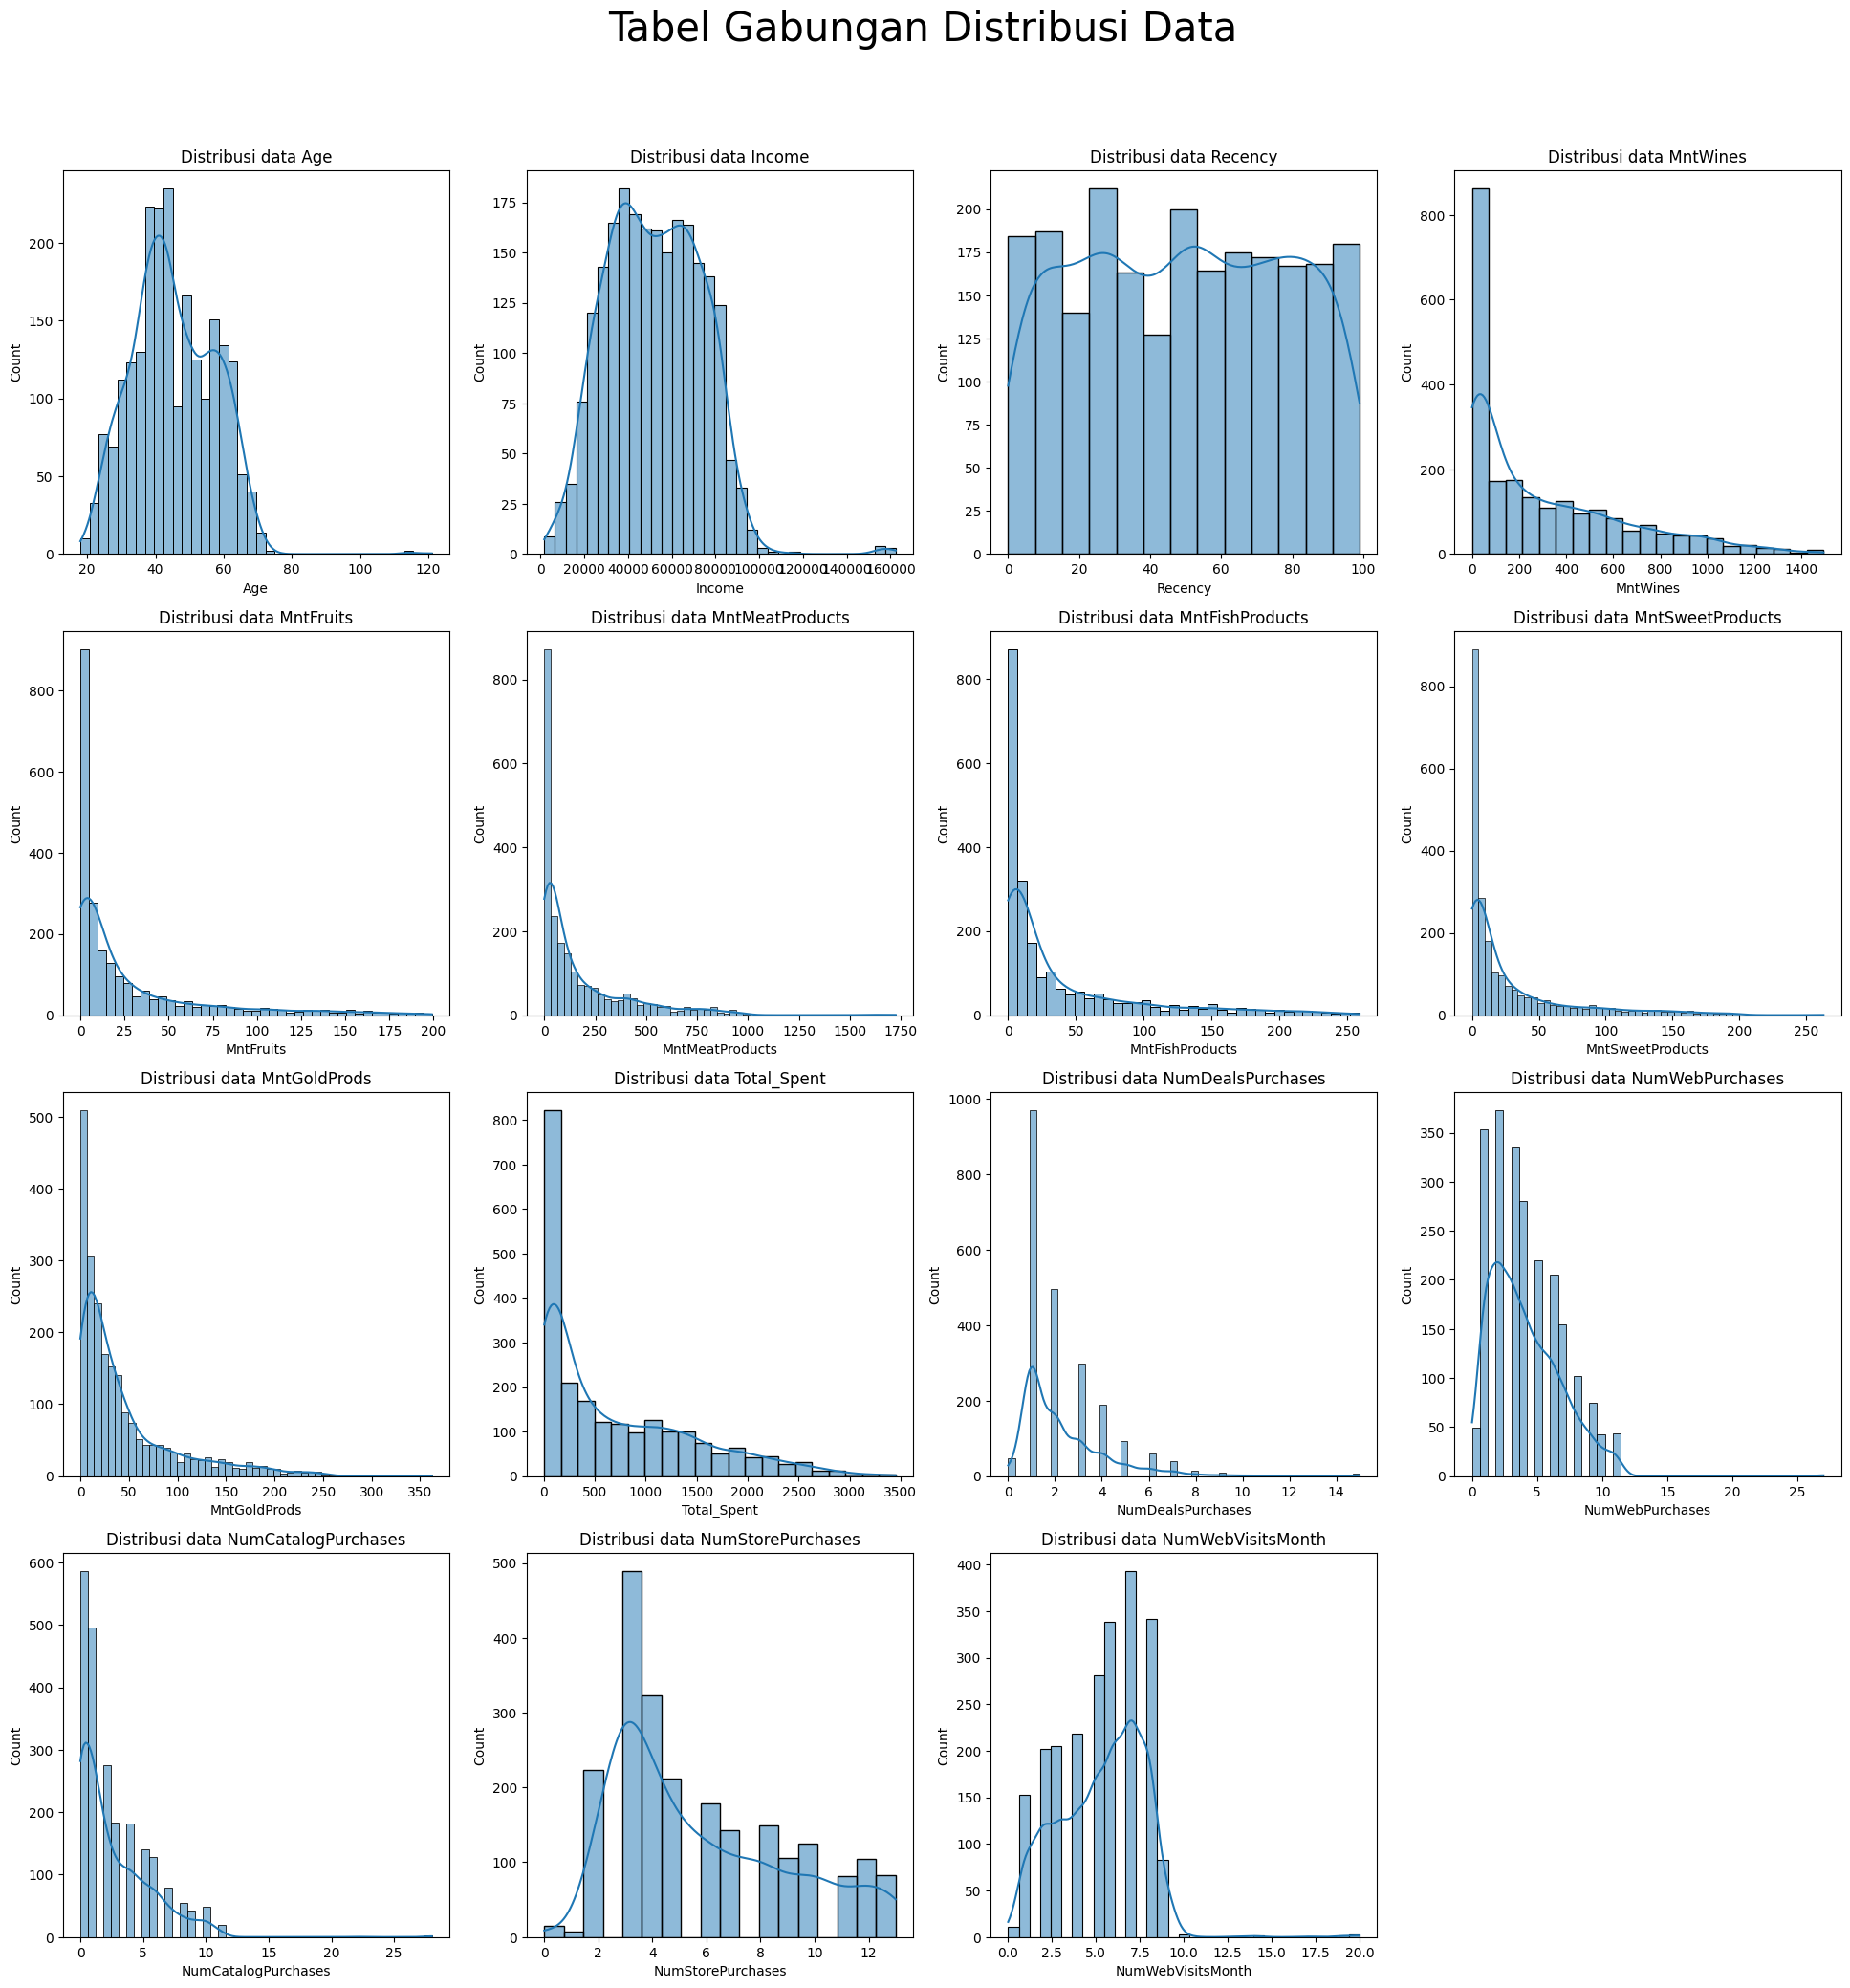

In [612]:
# membuat list kolom yang akan dilihat distribusi datanya dengan histplot
listKolom = ['Age','Income','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','Total_Spent','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']
kolom=0
n_cols=4
n_rows=4
plt.figure(figsize=(24,24))
for i in range(n_rows) :
    for j in range(n_cols) :
        if kolom==15 : # karena hanya ada 14 data, maka akan dibreak ketika kolom==14
            break
        else :
            plt.subplot(n_rows,n_cols,kolom+1)
            sns.histplot(data=df, x=listKolom[kolom], kde=True)
            plt.title(f'Distribusi data {listKolom[kolom]}')
            kolom+=1

plt.suptitle('Tabel Gabungan Distribusi Data', size=30, y=0.95)
plt.show()

**Analisis**

- Kolom age dan income menunjukkan distribusi yang mengikuti kurva bell pada distribusi normal (akan dicek normalitasnya di sesi selanjutnya)
- Kolom spent setiap produk dan total spent menunjukkan kurva yang memiliki central of tendency didaerah 0. Hal ini disebabkan karena banyak user yang mungkin tidak membeli produk tertentu sama sekali, tp membeli produk lainnya
- Kolom lainnya menunjukkan distribusi yang cukup acak yang nantinya akan dicek normalitasnya

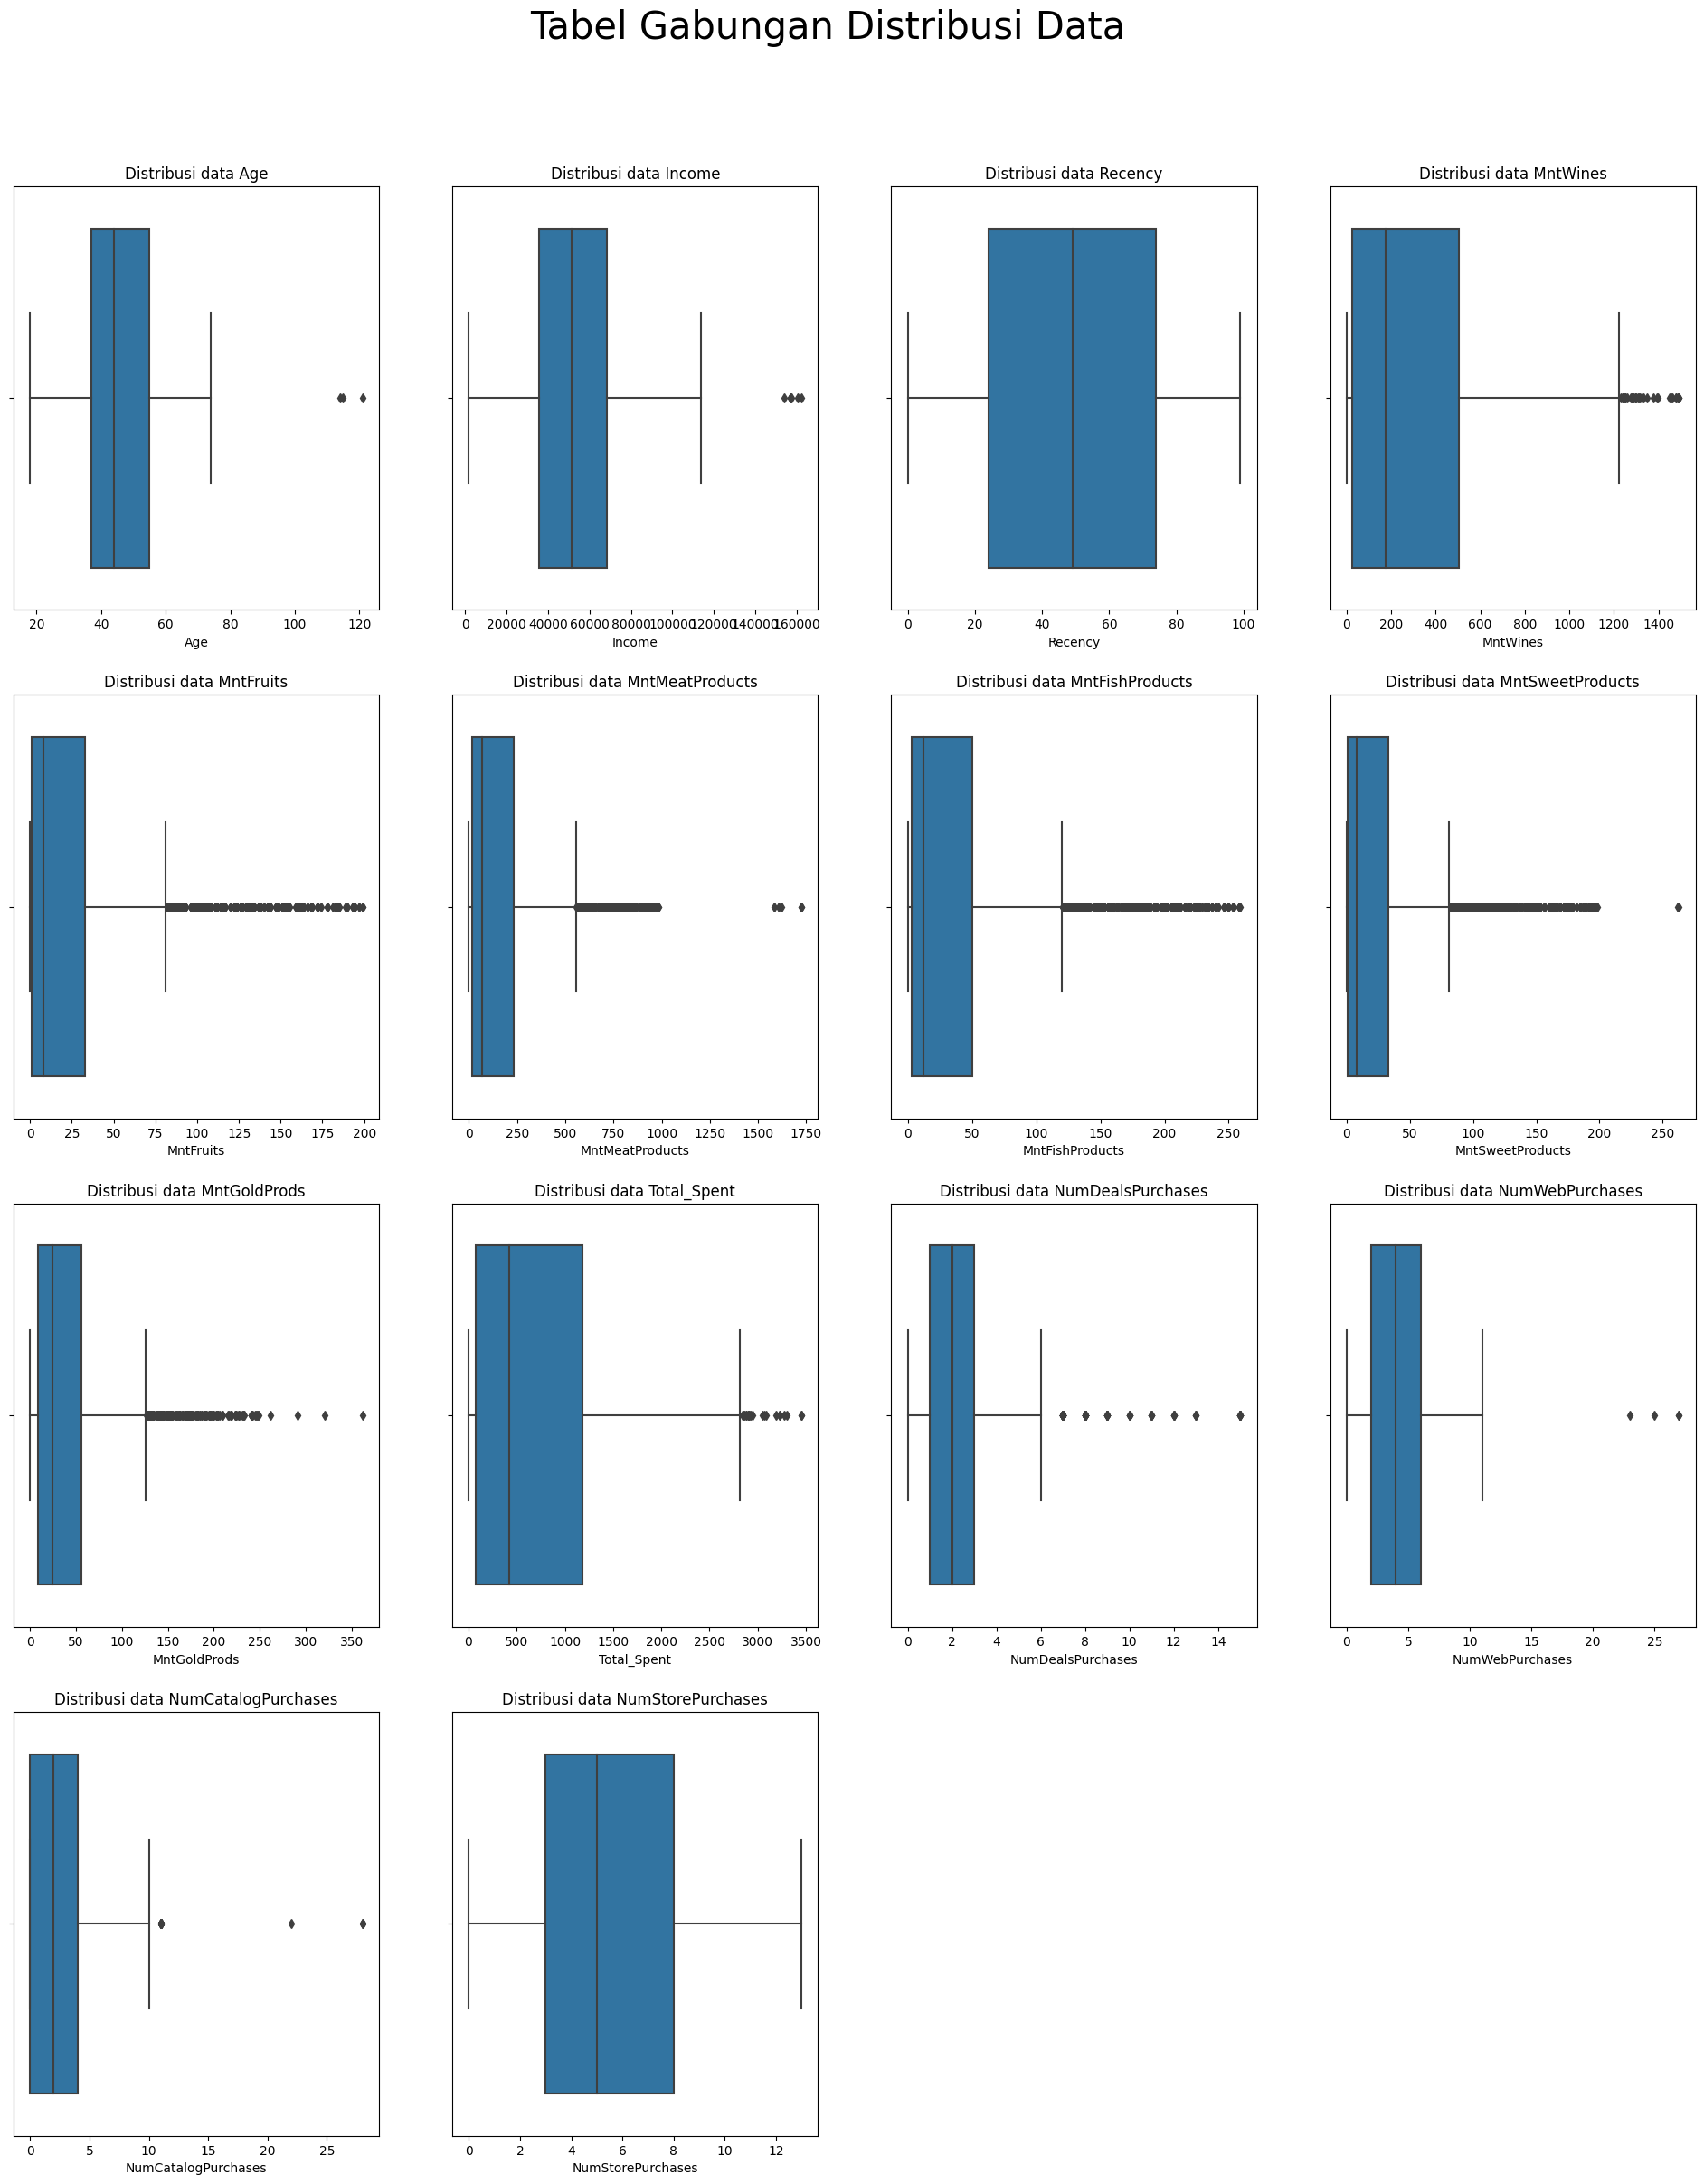

In [613]:
# membuat list kolom yang akan dilihat distribusi datanya dengan Boxplot
kolom=0
n_cols=4
n_rows=4
plt.figure(figsize=(24,28))
for i in range(n_rows) :
    for j in range(n_cols) :
        if kolom==14 :
            break
        else :
            plt.subplot(n_rows,n_cols,kolom+1)
            sns.boxplot(data=df, x=listKolom[kolom])
            plt.title(f'Distribusi data {listKolom[kolom]}')
            kolom+=1

plt.suptitle('Tabel Gabungan Distribusi Data', size=30, y=0.95)
plt.show()

**Analisis**

- Tidak ada outlier kiri pada semua data, hal ini karena nilai terendah adalah 0 (tidak ada nilai minus), sehingga beberapa lower fence lebih kecil dari (Q1 - 1.5 IQR)-nya
- Kolom spent pada setiap produk memiliki banyak sekali outlier disebelah kanan. Hal ini karena ada beberapa pelanggan yang sangat menyukai produk tertentu sehingga membelinya dengan jumlah yang jauh lebih banyak dari orang rata-rata
- Kolom recency dan NumStorePurchases tidak memiliki outlier

### **Cek Normalitas**

Karena data hanya memiliki 2239 baris (< 5000 baris), untuk uji normalitas dipakai metode saphiro karena lebih akurat

In [614]:
# Memasukkan pvalue dan status normalitas kedalam list agar dibuat dalam data frame nantinya
listpvalue = []
listStatusNormal = []

for i in listKolom :
    stat,pvalue=shapiro(df[i])
    if pvalue>=0.05:
        status = 'Terdistribusi normal' #fail to reject Ho
    else: 
        status = 'Tidak terdistribusi normal' #reject Ho (Ha)
    listpvalue.append(pvalue)
    listStatusNormal.append(status)

In [615]:
dfNormalitas = pd.DataFrame({
    'Kolom' : listKolom,
    'pvalue' : listpvalue,
    'Status_Normalitas' : listStatusNormal
})
dfNormalitas

,Kolom,pvalue,Status_Normalitas
0,Age,4.602783e-19,Tidak terdistribusi normal
1,Income,4.659492e-19,Tidak terdistribusi normal
2,Recency,5.787724e-26,Tidak terdistribusi normal
3,MntWines,5.983544e-43,Tidak terdistribusi normal
4,MntFruits,0.000000e+00,Tidak terdistribusi normal
5,MntMeatProducts,0.000000e+00,Tidak terdistribusi normal
6,MntFishProducts,0.000000e+00,Tidak terdistribusi normal
7,MntSweetProducts,0.000000e+00,Tidak terdistribusi normal
8,MntGoldProds,0.000000e+00,Tidak terdistribusi normal
9,Total_Spent,6.741647e-42,Tidak terdistribusi normal


**Analisis**
- Dari sini dapat dilihat bahwa tidak ada satupun data yang terdistribusi normal
- Semua uji statistik yang akan dilanjutkan pada analisis selanjutnya akan `menggunakan uji non-parametrik`
- Untuk membandingkan nilai antar kategori, akan digunakan `median` untuk semua kolom

## **Analisis Produk dan Perilaku Konsumen**


Selanjutnya akan dilakukan analisis jenis produk berdasarkan beberapa parameter seperti Age, Education, Marital Status, dan juga Total People

### **Analisis Pemasukan dari Setiap Produk**

Sebagai gambaran awal, akan coba dilihat persebaran pembelian tiap jenis produk selama dua tahun terakhir

In [616]:
SpentProduct=df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum()
dfSpentProduct=pd.DataFrame(SpentProduct).reset_index().rename(columns={'index' : 'Produk', 0 : 'Money_Spent'}).sort_values(by='Money_Spent',ascending=False)
dfSpentProduct['Grand_Money_Spent'] = dfSpentProduct['Money_Spent'].sum()
dfSpentProduct['Persentase'] = (dfSpentProduct['Money_Spent']/dfSpentProduct['Grand_Money_Spent']).round(3)*100
dfSpentProduct


,Produk,Money_Spent,Grand_Money_Spent,Persentase
0,MntWines,680807,1356926,50.2
2,MntMeatProducts,373950,1356926,27.6
5,MntGoldProds,98597,1356926,7.3
3,MntFishProducts,84049,1356926,6.2
4,MntSweetProducts,60620,1356926,4.5
1,MntFruits,58903,1356926,4.3


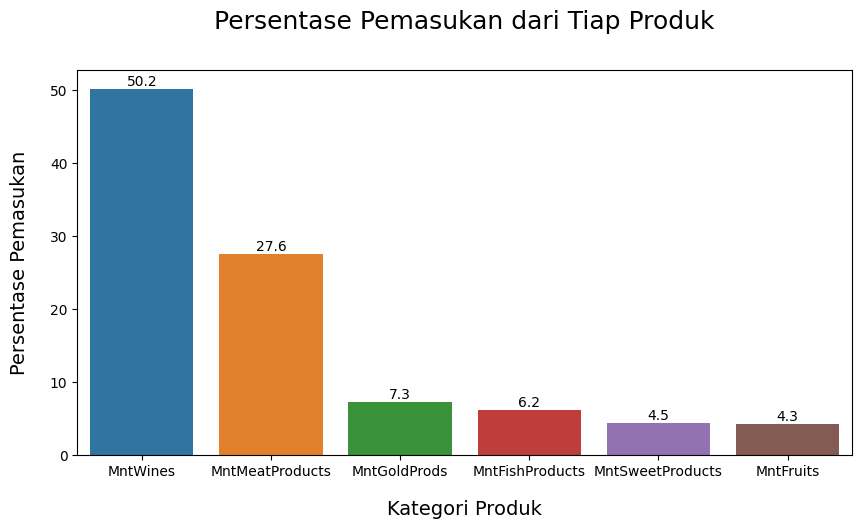

In [617]:
plt.figure(figsize=(10,5))
plot=sns.barplot(data = dfSpentProduct, x='Produk', y='Persentase')
plt.xlabel('Kategori Produk', size=14, labelpad=15) #Mengatur jarak antara label dengan x-axis
plt.ylabel('Persentase Pemasukan', size=14, labelpad=15) #Mengatur jarak antara lbel dengan y-axis
plt.title('Persentase Pemasukan dari Tiap Produk',size=18,pad=30)
plot.bar_label(plot.containers[0],label_type='edge')
plt.show()

Dari sini dapat dilihat bahwa :
- penghasilan terbesar supermarket (sekitar `85%` dari pendapatan perusahaan) berasal dari `wine`, kemudian diikuti oleh `produk daging`, dan kemudian `emas`. Jika kita generalisir, orang-orang lebih banyak mengeluarkan uangnya untuk `hiburan` (wine), kemudian `kebutuhan pangan` (daging), dan kemudian `investasi` (emas)

- Dari data ini juga terlihat bahwa `pemmbelian buah-buahan sangat sedikit (4.3% dari revenue supermarket)`. Padahal buah termasuk produk yang beresiko dan membutuhkan pengamanan tinggi (harus memakai freezer). Oleh karena itu bisa dipertimbangkan untuk menghilangkan buah dari daftar produk supermarket

### **Analisis Pemasukan berdasarkan Beberapa Parameter**

setelah itu, akan coba dilihat distribusi pembelian produk berdasarkan masing-masing parameter

### Analisis Produk Berdasarkan Rentang Umur

Dari sini dapat dilihat bahwa pelanggan paling banyak pada rentang umur 36 tahun - 45 tahun

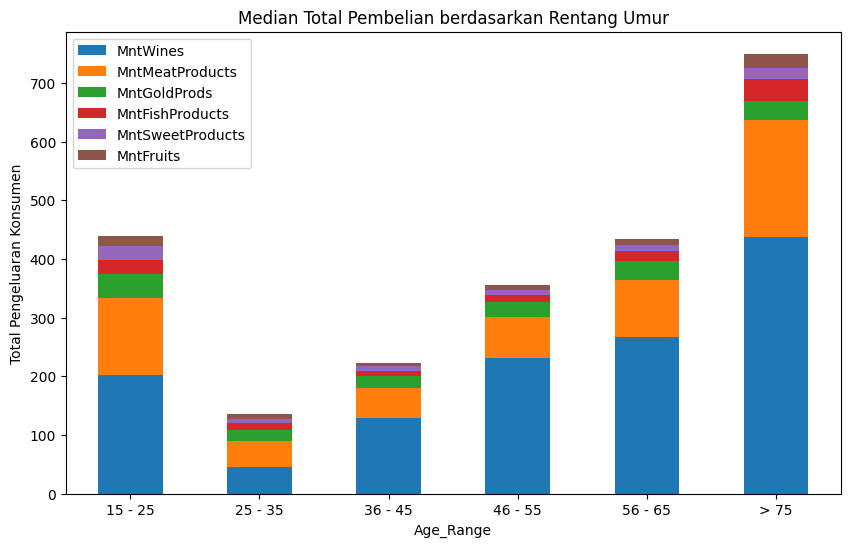

In [618]:
# Melihat pengeluaran orang-orang di supermarket berdasarkan rentang umur
dfbyAgeRange=df.groupby('Age_Range')[['MntWines','MntMeatProducts','MntGoldProds','MntFishProducts','MntSweetProducts','MntFruits']].median()
dfbyAgeRange.plot(kind='bar', stacked=True,figsize=(10,6))
plt.title('Median Total Pembelian berdasarkan Rentang Umur')
plt.ylabel('Total Pengeluaran Konsumen')
plt.xticks(rotation=0)
plt.show()

**Analisis**
- Secara umum, setiap umur `memiliki trend pengeluaran yang sama, yaitu wine, kemudian diikuti dengan produk daging, kemudian diikuti dengan produk emas`. Hal ini berarti prioritas orang-orang baik yang sudah menikah, sudah bercerai, maupun yang masih single, adalah `hiburan` (wine), kemudian `kebutuhan pangan` (daging), dan kemudian `investasi` (emas). 
- `pada orang-orang yang berumur 75 tahun keatas, mereka cendrung membeli lebih banyak produk ikan` dibandingkan produk emas. Hal ini dikarenakan orang-orang pada lanjut usia lebih memperhatikan aspek kesehatan sehingga mereka mulai beralkih ke makanan yang leih sehat seperti ikan untuk menjaga kesehatannya
- Berdasarkan umur, pembelian paling banyak dilakukan oleh orang-orang yang berumur `>75 tahun`, kemudian diikuti oleh orang-orang berumur `0 - 25 tahun`. Jika dilihat dari usia produktif (usia bekerja), rata-rata orang bekerja dari umur 25 - 65 tahun. Yang artinya perilaku konsumtif orang pada usia produktif cendrung lebih rendah dibandingkan orang dengan usia non-produktif
- Secara logika, orang berumur 0 - 25 tahun harusnya belum memiliki banyak pengeluaran karena mayoritas masih single dan juga belum punya anak, hal ini mungkin dikarenakan orang pada usia tersebut masih mendapatkan uang dari orang tua dan cendrung lebih konsumtif karena ingin mengikuti trend
- Untuk orang yang berada pada usia produktif, diawal karir (umur 25-35) mereka cendrung sangat berhemat dan juga belum memiliki anak ataupun masih punya anak yang sedikit. Seiring umur bertambah, dikarenakan oleh berbagai faktor (penghasilan yang semakin naik dan jumlah orang dirumah yang bertambah), `dapat dikatakan bahwa semakin tua seseorang, merekapun menjadi semakin konsumtif`

Karena kita banyak mengaitkan faktor antara rentang umur dan income, maka kita akan mencoba melihat hubungan antara umur dan juga income :

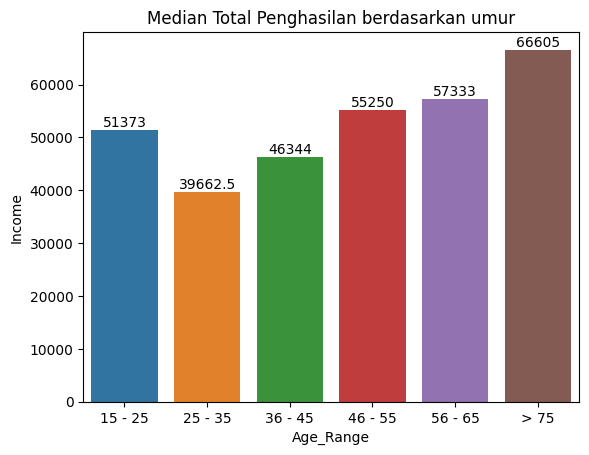

In [619]:
plot=sns.barplot(data = df.groupby('Age_Range',as_index=False)[['Income']].median(), x='Age_Range', y='Income')
plot.bar_label(plot.containers[0],label_type='edge')
plt.title('Median Total Penghasilan berdasarkan umur')
plt.show()

**Analisis**

- Dapat dilihat bahwa pola grafik rentang_umur-penghasilan memiliki pola yang sama dengan grafik rentang_umur-pengeluaran. Dimana semakin tua umur, maka penghasilan juga akan naik. Tetapi kita menemukan sesuatu yang unik dimana `penghasilan orang berumur 15-25 tahun cukup tinggi`. Tidak heran jika mereka menjadi konsumtif. Tetapi ada kemungkinan bahwa mereka masih mendapatkan bantuan orangtua untuk pendanaan, bukan pure dari hasil bekerja saja
- Kesimpulan secara umumnya adalah `semakin tua seseorang, maka penghasilan mereka cendrung naik dan perilaku mereka juga menjadi semakin konsumtif`

### Analisis Produk Berdasarkan Jenjang Pendidikan

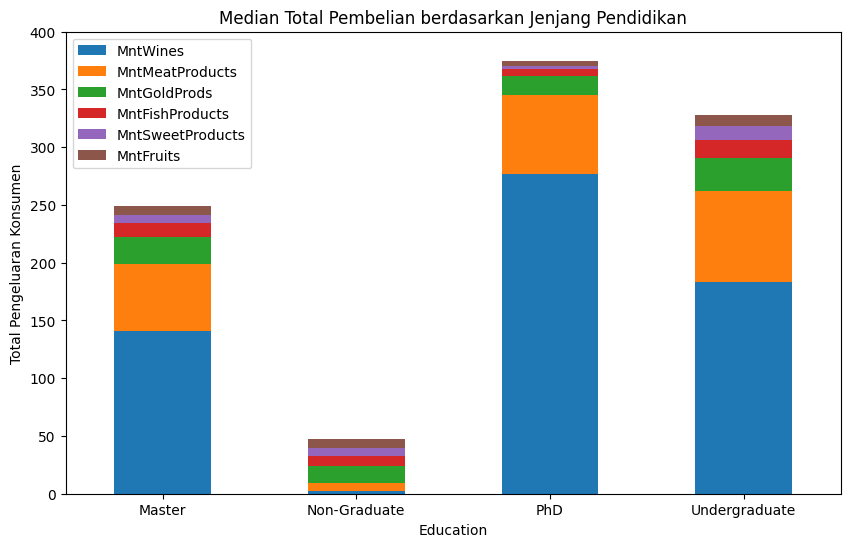

In [620]:
# Melihat pengeluaran orang-orang di supermarket berdasarkan rentang umur
dfbyMaritalStatus=df.groupby('Education')[['MntWines','MntMeatProducts','MntGoldProds','MntFishProducts','MntSweetProducts','MntFruits']].median()
dfbyMaritalStatus.plot(kind='bar', stacked=True,figsize=(10,6))
plt.title('Median Total Pembelian berdasarkan Jenjang Pendidikan')
plt.ylabel('Total Pengeluaran Konsumen')
plt.yticks(range(0,450,50))
plt.xticks(rotation=0)
plt.show()

**Analysis**
- Secara general, 3 kategori produk favorit stiap jenjang pendidikan masih sama, yaitu `wine`, `produk daging`, dan `emas`.
- `Pada kelompok customer yang tidak menempuh pendidikan sarjana (non-graduate), justru terlihat bahwa prioritas mereka adalah produk investasi (emas), kemudian kebutuhan pangan (produk daging dan produk ikan)`

Karena kita banyak mengaitkan faktor antara jenjang pendidikan dan income, maka kita akan mencoba melihat hubungan antara pendidikan dan juga income :

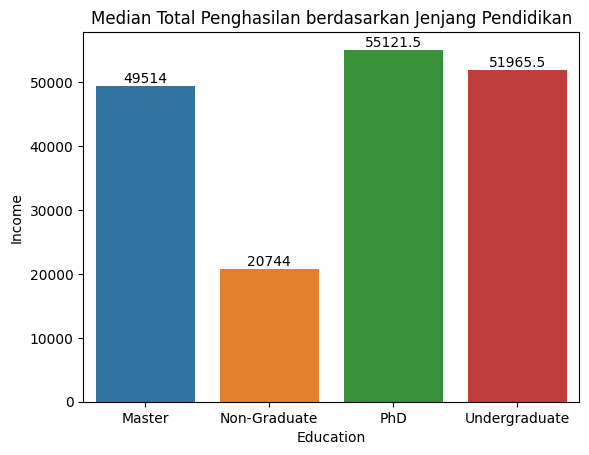

In [621]:
plot=sns.barplot(data = df.groupby('Education',as_index=False)[['Income']].median(), x='Education', y='Income')
plot.bar_label(plot.containers[0],label_type='edge')
plt.title('Median Total Penghasilan berdasarkan Jenjang Pendidikan')
plt.show()

**Analisis**

- Dapat dilihat bahwa pola grafik pendidikan-penghasilan memiliki pola yang sama dengan grafik pendidikan-pengeluaran. Dimana semakin tinggi pendidikan seseorang, penghasilannya juga cenderung semakin besar. Hal ini juga menjawab pertanyaan kenapa pada orang yang berpendidikan tidak sarjana, memiliki prioritas berbelanja yang beda dari yang lainnya, hal ini disebabkan mereka tidak punya cukup uang untuk menghabiskannya dengan produk hiburan (wine), sehingga lebih mengutamakan kebutuhan investasi dan pangan
- Kesimpulan secara umumnya adalah `semakin tinggi pendidikan seseorang seseorang, maka penghasilan mereka cendrung naik dan perilaku mereka juga menjadi semakin konsumtif`

### Analisis Produk Berdasarkan Status Pernikahan

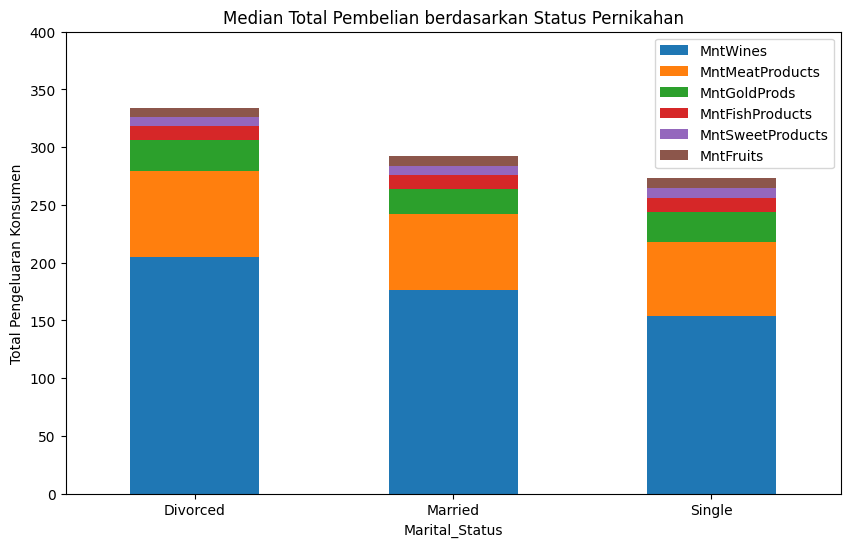

In [622]:
# Melihat pengeluaran orang-orang di supermarket berdasarkan rentang umur
dfbyMaritalStatus=df.groupby('Marital_Status')[['MntWines','MntMeatProducts','MntGoldProds','MntFishProducts','MntSweetProducts','MntFruits']].median()
dfbyMaritalStatus.plot(kind='bar', stacked=True,figsize=(10,6))
plt.title('Median Total Pembelian berdasarkan Status Pernikahan')
plt.ylabel('Total Pengeluaran Konsumen')
plt.yticks(range(0,450,50))
plt.xticks(rotation=0)
plt.show()

**Analysis**
- Secara general, 3 kategori produk favorit dari setiap jenis status pernikahan adalah sama, yaitu `wine`, `produk daging`, dan `emas`. Hal ini berarti prioritas orang-orang baik yang sudah menikah, sudah bercerai, maupun yang masih single, adalah `hiburan` (wine), kemudian `kebutuhan pangan` (daging), dan kemudian `investasi` (emas)
- Dari data ini, orang yang paling banyak menghabiskan uangnya adalah orang-orang yang sudah bercerai, kemudian orang-orang yang berpasangan (menikah), kemudian yang terakhir adalah orang-orang berstatus single. Kalau kita lihat sekilas, perbedaan yang cukup signifikan terlihat pada total pengeluaran untuk wine. Berhubung wine biasanya diminum untuk meredakan stress, kita dapat mengatakan bahwa orang yang sudah bercerai memiliki tingkat stress yang lebih tinggi, kemudian diikuti oleh orang berpasangan, dan yang paling akhir adalah orang-orang dengan status single

### Analisis Produk Berdasarkan Jumlah Orang Dirumah

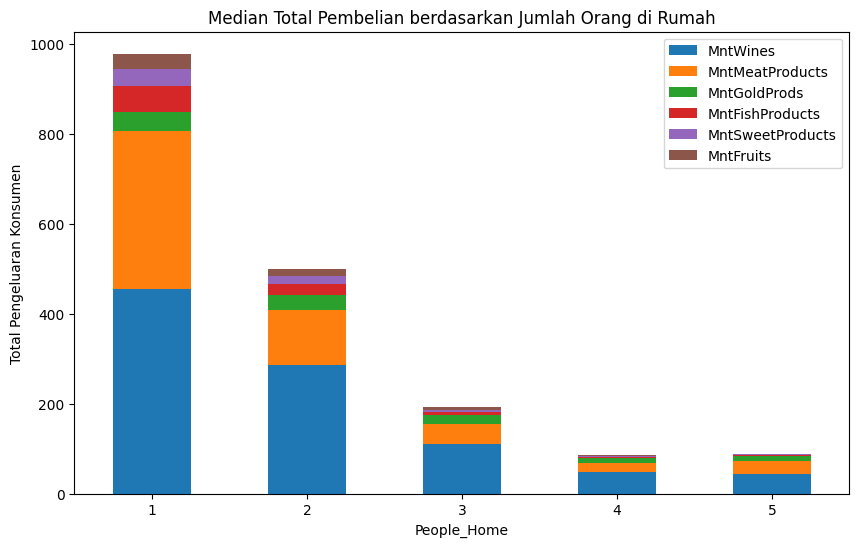

In [623]:
# Melihat pengeluaran orang-orang di supermarket berdasarkan rentang umur
dfbyMaritalStatus=df.groupby('People_Home')[['MntWines','MntMeatProducts','MntGoldProds','MntFishProducts','MntSweetProducts','MntFruits']].median()
dfbyMaritalStatus.plot(kind='bar', stacked=True,figsize=(10,6))
plt.title('Median Total Pembelian berdasarkan Jumlah Orang di Rumah')
plt.ylabel('Total Pengeluaran Konsumen')
plt.xticks(rotation=0)
plt.show()

**Analysis**
- Secara general, 3 kategori produk favorit dari setiap kategori jumlah orang dirumah adalah sama, yaitu `wine`, `produk daging`, dan `emas`. Yang berarti prioritas orang-orang berbelanja di supermarket ini adalah `hiburan` (wine), kemudian `kebutuhan pangan` (daging), dan kemudian `investasi` (emas)
- `Orang yang tinggal sendiri dirumah cendrung lebih banyak membeli produk ikan`
- Dapat dilihat bahwa terdapat sesuatu yang unik dimana semakin banyak jumlah orang dirumah, justru pengeluarannya semakin mengecil. `Pengeluaran paling besar dihabiskan oleh orang yang sendiri (single)`

### **Korelasi income dengan setiap produk**

In [624]:
df_corr = df[['Income','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','Total_Spent']].corr(method='spearman')
df_corr

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Spent
Income,1.000000,0.828100,0.577372,0.812697,0.573605,0.563156,0.503517,0.853751
MntWines,0.828100,1.000000,0.517886,0.823589,0.524688,0.505221,0.575243,0.923430
MntFruits,0.577372,0.517886,1.000000,0.713340,0.705022,0.691666,0.568844,0.659757
MntMeatProducts,0.812697,0.823589,0.713340,1.000000,0.726275,0.695719,0.637759,0.957733
MntFishProducts,0.573605,0.524688,0.705022,0.726275,1.000000,0.700979,0.565239,0.668207
MntSweetProducts,0.563156,0.505221,0.691666,0.695719,0.700979,1.000000,0.542869,0.657377
MntGoldProds,0.503517,0.575243,0.568844,0.637759,0.565239,0.542869,1.000000,0.673229
Total_Spent,0.853751,0.923430,0.659757,0.957733,0.668207,0.657377,0.673229,1.000000


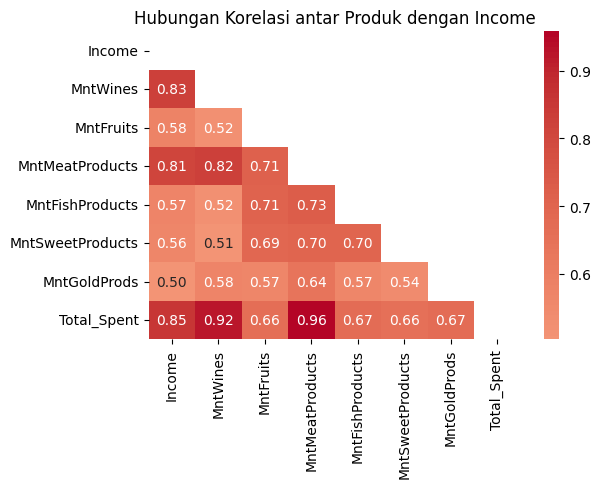

In [625]:
matriks = np.triu(df_corr)
plt.figure(figsize=(6,4))
sns.heatmap(data=df_corr, annot = True, cmap='coolwarm',center=0, mask = matriks, fmt='.2f')
plt.title('Hubungan Korelasi antar Produk dengan Income')

plt.xticks(rotation=90)

plt.show()

**Analysis**

- Dapat dilihat bahwa `income dan total spent memiliki korelasi 0.85 yang merupakan korelasi kuat positif (>0.7)`. Sehingga seperti yang telah dibahas diatas, semakin besar penghasilan seseorang, maka mereka akan semakin konsumtif
- `Setiap jenis produk juga memiliki korelasi positif moderat dan kuat`. Menandakan bahwa pasar tidak tersegmentasi yang artinya secara umum, tidak ada produk yang tidak disukai oleh pelanggan, karena jika seandainya ada. Harusnya mereka memiliki korelasi yang lemah terhadap produk lainnya
- Produk yang memiliki korelasi paling kuat dengan income customer adalah `produk daging (0.96)`

Text(0.5, 1.0, 'Relationships : Income VS Total Spent')

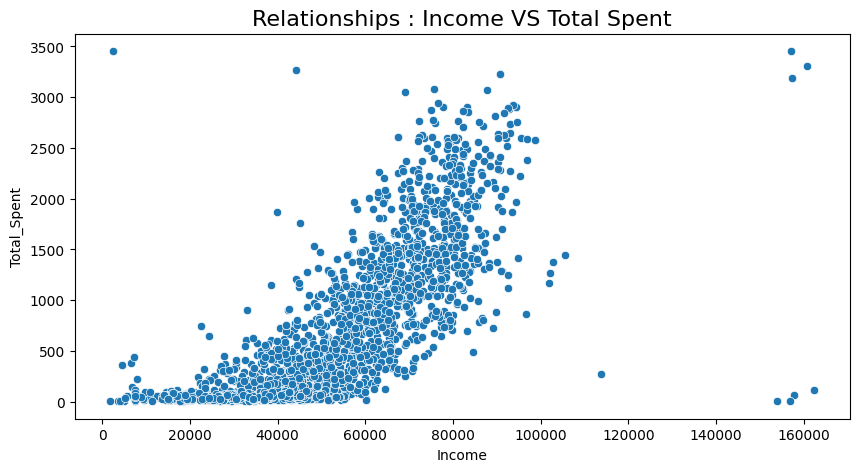

In [626]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x = 'Income', y='Total_Spent')
plt.title('Relationships : Income VS Total Spent', size =16)

Kita coba lakukan scatterplot terhadap dua variabel numerikal yang memiliki korelasi paling erat, yaitu income dan total spent, dan dari sini terlihat bahwa punya hubungan yang cendrung positif kuat. Selain itu, dapat kilihat bahwa terdapat dua titik yang memiliki total spent paling tinggi, yang satu punya penghasilan tinggi sedangkan yang satu lagi punya penghasilan rendah, untuk lebih jelasnya kita akan cari siapakah 2 orang itu :

In [627]:
df[df['Total_Spent']>3400]

,ID,Year_Birth,Age,Age_Range,Education,Marital_Status,Income,Kidhome,Teenhome,People_Home,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,Total_Spent,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Promo_Taken
21,5376,1979,35,25 - 35,Undergraduate,Married,2447.0,1,0,3,2013-01-06,42,1,1,1725,1,1,3453,1,15,0,28,0,1,0,0,0,0,0,0,3,11,0,0
1653,4931,1977,37,36 - 45,Undergraduate,Married,157146.0,0,0,2,2013-04-29,13,1,0,1725,2,1,3453,1,0,0,28,0,1,0,0,0,0,0,0,3,11,0,0


Dari sini terlihat bahwa mereka adalah orang yang memiliki status sudah menikah, sehingga dapat diasumsikan kalau mereka adalah pasangan. `Sebaiknya pasangan ini diberikan perlakuan spesial karena mereka adalah pelanggan paling setia dari supermarket ini`

### **Analisis Komplain dalam Dua Tahun Terakhir**

In [628]:
# menghitung jumlah komplain
jumlahComplain = df['Complain'].sum()
jumlahCustomer = df['ID'].count()
jumlahNonComplain = df['ID'].count() - df['Complain'].sum() 

In [629]:
# membuat dataframe terkait complaint
dfComplaint = pd.DataFrame({
    'Total_Customer_Komplain' : [jumlahComplain],
    'Total_Customer_Tidak_Komplain' : [jumlahNonComplain]
})
dfComplaint=dfComplaint.T.reset_index().rename(columns={'index' : 'Category', 0 : 'Jumlah_Customer'})
dfComplaint

,Category,Jumlah_Customer
0,Total_Customer_Komplain,21
1,Total_Customer_Tidak_Komplain,2218


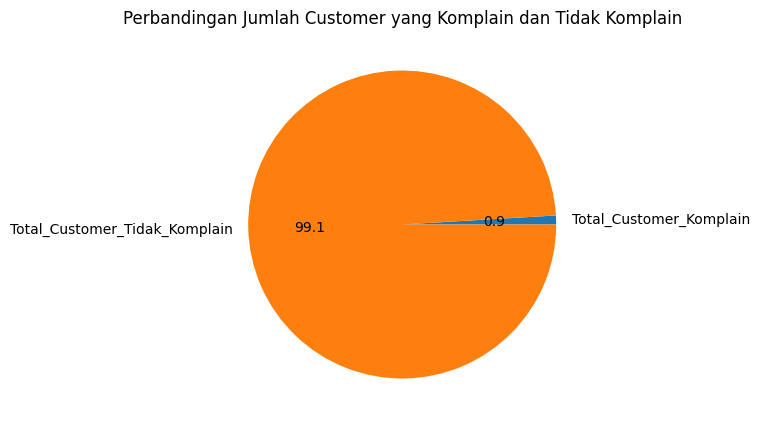

In [630]:
# plot grafik
plt.figure(figsize=(10,5))
plt.pie(
    x= dfComplaint['Jumlah_Customer'], # isi dengan kolom numerikal
    labels= dfComplaint['Category'], # isi dengan kolom kategorikal
    autopct = f'%.1f', # untuk menampilkan persentasi
)
plt.title('Perbandingan Jumlah Customer yang Komplain dan Tidak Komplain')
plt.show()


**Analisis**

Dari sini dapat dilihat bahwa selama 2 tahun terakhir, `hanya 0.9% customer yang mengajukan complain, dimana 99.1% diprediksi telah puas dengan pelayanan supermarket`. Sehingga dapat disimpulkan bahwa produk yang dijual sudah cukup baik dan customer service pada supermarket juga sudah bekerja dengan cukup baik.

## **Analisis Promo/Kampanye**

Selanjutnya akan dilakukan analisis seberapa efektif promosi yang telah dilakukan berdasarkan beberapa parameter seperti Age, Education, Marital Status, Total People, dan juga Income

### **Ketertarikan Pelanggan terhadap Promo**

Secara umum, kita akan melihat bagaimana ketertarikan orang terhadap Promo yang pernah diadakan :

In [631]:
dfPromoTaken = df.groupby('Promo_Taken',as_index=False)['ID'].count()
dfPromoTaken['Total_ID']=dfPromoTaken['ID'].sum()
dfPromoTaken['Percentage']=(dfPromoTaken['ID']/dfPromoTaken['Total_ID']).round(3)*100
dfPromoTaken

,Promo_Taken,ID,Total_ID,Percentage
0,0,1630,2239,72.8
1,1,370,2239,16.5
2,2,142,2239,6.3
3,3,51,2239,2.3
4,4,36,2239,1.6
5,5,10,2239,0.4


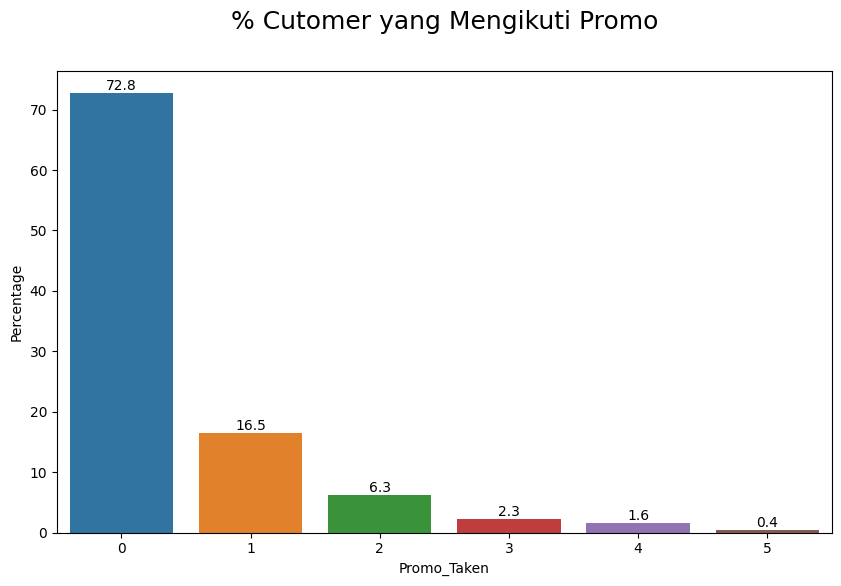

In [632]:
plt.figure(figsize=(10,6))
plot=sns.barplot(data=dfPromoTaken,x='Promo_Taken',y='Percentage')
plt.title('% Cutomer yang Mengikuti Promo',size=18,pad=30)
plot.bar_label(plot.containers[0],label_type='edge')
plt.show()

**Analisis**

Dari sini dapat dilihat bahwa sebanyak 72.8% customer tidak pernah mengambil promo. `Hal ini mengindikasikan bahwa promo yang ditawarkan selama ini kurang menarik dan perlu ditingkatkan dengan cukup signifikan`, karena total orang yang mengikuti promo hanya sekitar 27.2% dari keseluruhan customer. Hal ini bisa saja disebabkan karena 2 hal :
1. Promo kurang terpublikasi sehingga banyak customer yang tidak ikut promo karena memang tidak tau
2. Promo kurang menarik bagi customer

### **Analisis Berdasarkan tipe kampanye**

In [633]:
Promo=df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].sum()
dfPromo=pd.DataFrame(Promo).reset_index().rename(columns={'index' : 'Promo', 0 : 'Jumlah_Promo_Diambil'})
dfPromo

,Promo,Jumlah_Promo_Diambil
0,AcceptedCmp1,144
1,AcceptedCmp2,30
2,AcceptedCmp3,163
3,AcceptedCmp4,167
4,AcceptedCmp5,163
5,Response,334


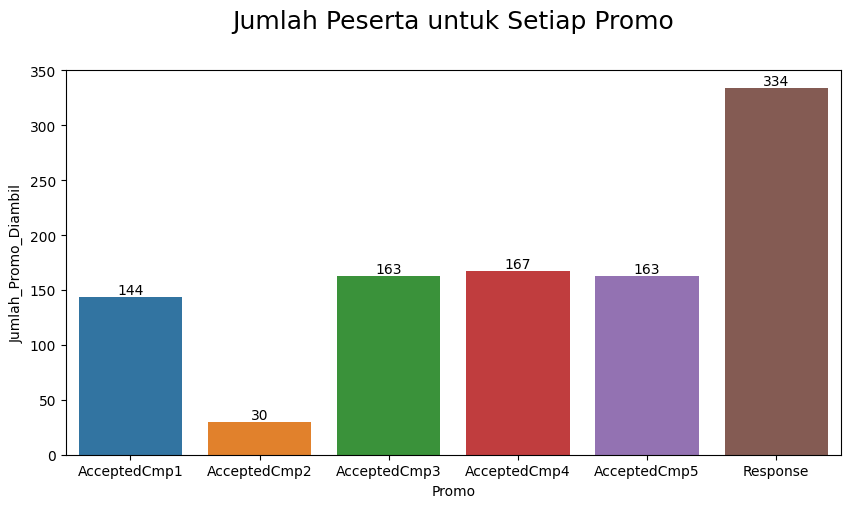

In [634]:
plt.figure(figsize=(10,5))
plot=sns.barplot(data = dfPromo, x='Promo', y='Jumlah_Promo_Diambil')
plt.title('Jumlah Peserta untuk Setiap Promo',size=18,pad=30)
plot.bar_label(plot.containers[0],label_type='edge')
plt.show()

**Analisis**

- Kampanye terakhir dapat dikatakan jauh lebih sukses dari kampanye sebelumnya, bahkan mencapat `11 x lipat lebih banyak respon dari kampanye ke-2` dan `2 x lebih banyak respon dari kampanye 3, 4, dan 5`. Oleh karena itu, sebaiknya untuk kampanye-kampanye selanjutnya, dianjurkan mengikuti strategi kampanye yang terakhir

### **Analisis Ketertarikan Pelanggan Terhadap Promo Berdasarkan Beberapa Parameter**

Untuk mengetahui strategi promo yang paling efektif, akan dilakukan analisis dari berbagai sisi :

### Analisis Promo Berdasarkan Age_Range

Sebelum melihat promo apa yang cocok ditingkatkan, terlebih dahulu kita lihat hubungan antara banyaknya promo yang diambil dan Total Spent dari customer berdasarkan rentang umur:

In [635]:
# Mencari total pelanggan berdasarkan umur
df['Age_Range'].value_counts()

Age_Range
36 - 45    757
46 - 55    486
56 - 65    439
25 - 35    416
> 75       80 
15 - 25    61 
Name: count, dtype: int64

In [636]:
dfbyAgeRange2=df.groupby('Age_Range')[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].sum()
dfTotalSpentAge=df[['Total_Spent','Age_Range']].groupby('Age_Range',as_index=False).sum()

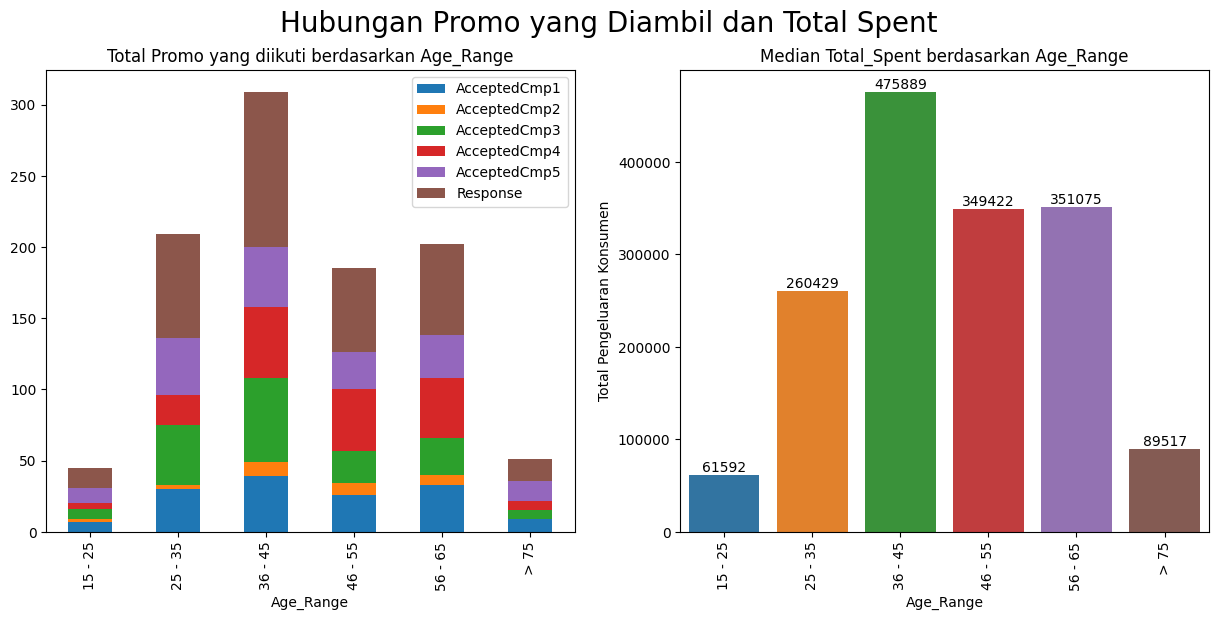

In [637]:
fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(15,6))

plt.suptitle('Hubungan Promo yang Diambil dan Total Spent', size = 20)

dfbyAgeRange2.plot(kind='bar', stacked=True,ax=axes[0])
axes[0].set_title('Total Promo yang diikuti berdasarkan Age_Range')
plt.ylabel('Total Promo diikuti')
plot.bar_label(plot.containers[0],label_type='edge')
plt.xticks(rotation=90)


axes[1].set_title('Median Total_Spent berdasarkan Age_Range')
plot2=sns.barplot(data=dfTotalSpentAge,x='Age_Range',y='Total_Spent',ax=axes[1])
plt.ylabel('Total Pengeluaran Konsumen')
plot2.bar_label(plot2.containers[0],label_type='edge')
plt.xticks(rotation=90)

plt.show()

**Analisis**

- Berdasarkan umur, dapat dilihat bahwa `semakin banyak orang yang mengambil promo, maka total_spentnya juga semakin tinggi`. Hal ini menunjukkan keterkaitan antara jumlah promo yang diambil dan perilaku konsumtif seseorang
- Pada orang-orang berumur 25-35 Tahun, terlihat bahwa mereka `sering mengambil promo tetapi jumlah uamg yang mereka habiskan sedikit`. Kita menduga bahwa orang-orang di umur ini sedang struggling dengan keadaan finansial sehingga gencar mencari promo meskipun tidak dapat berbelanja terlalu banyak

Sekarang, mari kita lihat apakah jenis promo sebenarnya mempengaruhi ketertarikan orang dari umur tertentu dengan menggunakan Chi-Square test

In [638]:
dfbyAgeRange2

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
Age_Range,,,,,,
15 - 25,7,2,7,4,11,14
25 - 35,30,3,42,21,40,73
36 - 45,39,10,59,50,42,109
46 - 55,26,8,23,43,26,59
56 - 65,33,7,26,42,30,64
> 75,9,0,6,7,14,15


In [639]:
stat, pvalue, dof, expected = chi2_contingency(dfbyAgeRange2)
# conclusion :
if pvalue > 0.05 :
    print(f'''
          pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal menolak Ho.
          Kita TIDAK punya cukup bukti untuk mengatakan bahwa antara Rentang Umur dan Promo yang diambil ada keterkaitan (independent)'
          (proporsinya Tidak berbeda signifikan)
          ''')
else :
    print(f'''
          pvalue = {pvalue:.5f}. pvalue <= 0.05. Berhasil menolak Ho.
          Kita punya cukup bukti untuk mengatakan bahwa antara Rentang Umur dan Promo yang diambil ada keterkaitan (dependent)
          (proporsinya berbeda signifikan)
          ''')



          pvalue = 0.04643. pvalue <= 0.05. Berhasil menolak Ho.
          Kita punya cukup bukti untuk mengatakan bahwa antara Rentang Umur dan Promo yang diambil ada keterkaitan (dependent)
          (proporsinya berbeda signifikan)
          


Dari sini kita melihat bahwa ada keterkaitan antara jenis promo yang diikuti seseorang terhadap rentang umurnya. Sekarang, kita akan coba amati seberapa tertarik orang-orang pada kampanye yang sudah diadakan dengan melihat ratio total_kampanye_yang_diikuti/pelanggan berdasarkan rentang umurnya :

In [640]:
dfbyAgeRange2['Total_Response'] = dfbyAgeRange2.sum(axis=1)
dfbyAgeRange2['n_customer'] = df['Age_Range'].value_counts()
dfbyAgeRange2['Ratio_Campaign_Taken'] = (dfbyAgeRange2['Total_Response']/dfbyAgeRange2['n_customer']).round(2)
dfbyAgeRange2=dfbyAgeRange2.reset_index()
dfbyAgeRange2

,Age_Range,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Total_Response,n_customer,Ratio_Campaign_Taken
0,15 - 25,7,2,7,4,11,14,45,61,0.74
1,25 - 35,30,3,42,21,40,73,209,416,0.50
2,36 - 45,39,10,59,50,42,109,309,757,0.41
3,46 - 55,26,8,23,43,26,59,185,486,0.38
4,56 - 65,33,7,26,42,30,64,202,439,0.46
5,> 75,9,0,6,7,14,15,51,80,0.64


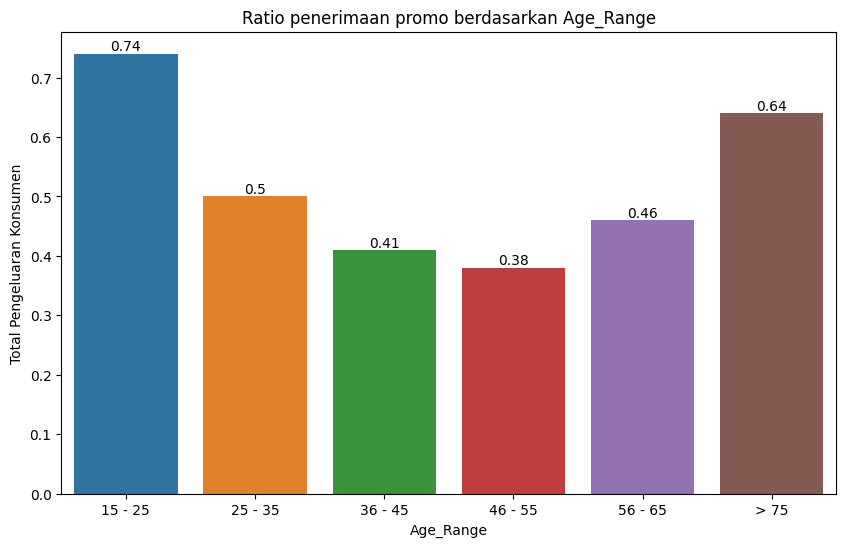

In [641]:
plt.figure(figsize=(10,6))
plot=sns.barplot(data=dfbyAgeRange2,x='Age_Range',y='Ratio_Campaign_Taken')
plt.title('Ratio penerimaan promo berdasarkan Age_Range')
plt.ylabel('Total Pengeluaran Konsumen')
plot.bar_label(plot.containers[0],label_type='edge')
plt.xticks(rotation=0)

plt.show()


**Analisis**
- `Customer yang paling banyak mengambil promo adalah customer dengan rentang umur 15-25 tahun`. Hal ini diduga karena konten dari promo lebih bernuansa anak muda ataupun mereka punya lebih banyak waktu untuk mengecek promo yang sedang berlangsung
- Dapat dilihat bahwa orang-orang di usia produktif mengambil promo lebih sedikit dibandingkan dengan orang-orang di usia tidak produktif. Oleh karena itu harusnya konten dari promo terseebut sebaiknya `membawa hal-hal yang berhubungan dengan dunia kerja agar orang-orang di usia produkti tertarik untuk mengambil promonya`

### Analisis Promo Berdasarkan Education

Sebelum melihat promo apa yang cocok ditingkatkan, terlebih dahulu kita lihat hubungan antara banyaknya promo yang diambil dan Total Spent dari customer berdasarkan jenjang pendidikan :

In [642]:
# Mencari total pelanggan berdasarkan jenjang pendidikan
df['Education'].value_counts()

Education
Undergraduate    1126
Master           573 
PhD              486 
Non-Graduate     54  
Name: count, dtype: int64

In [643]:
dfbyEducation2=df.groupby('Education')[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].sum()
dfTotalSpentEducation=df[['Total_Spent','Education']].groupby('Education',as_index=False).sum()

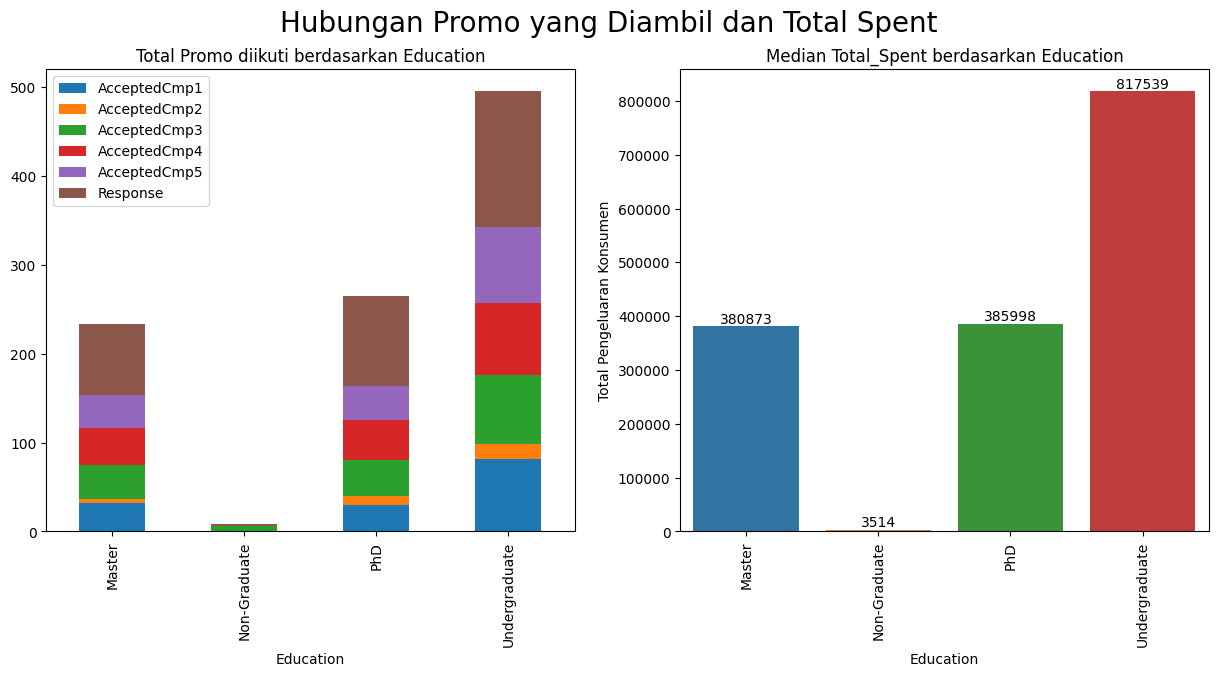

In [644]:
fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(15,6))

plt.suptitle('Hubungan Promo yang Diambil dan Total Spent', size = 20)

dfbyEducation2.plot(kind='bar', stacked=True,ax=axes[0])
axes[0].set_title('Total Promo diikuti berdasarkan Education')
plt.ylabel('Total Promo diikuti')
plot.bar_label(plot.containers[0],label_type='edge')
plt.xticks(rotation=90)


axes[1].set_title('Median Total_Spent berdasarkan Education')
plot2=sns.barplot(data=dfTotalSpentEducation,x='Education',y='Total_Spent',ax=axes[1])
plt.ylabel('Total Pengeluaran Konsumen')
plot2.bar_label(plot2.containers[0],label_type='edge')
plt.xticks(rotation=90)

plt.show()

**Analisis**

- Berdasarkan Education, dapat dilihat juga bahwa `semakin banyak orang yang mengambil promo, maka total_spentnya juga semakin tinggi`. Hal ini menunjukkan keterkaitan antara jumlah promo yang diambil dan perilaku konsumtif seseorang

Sekarang, mari kita lihat apakah jenis promo sebenarnya mempengaruhi ketertarikan orang dari jenjang pendidikan tertentu tertentu dengan menggunakan Chi-Square test

In [645]:
dfbyEducation2

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
Education,,,,,,
Master,32,4,39,41,38,79
Non-Graduate,0,0,6,0,0,2
PhD,30,10,40,45,39,101
Undergraduate,82,16,78,81,86,152


In [646]:
stat, pvalue, dof, expected = chi2_contingency(dfbyEducation2)
# conclusion :
if pvalue > 0.05 :
    print(f'''
          pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal menolak Ho.
          Kita TIDAK punya cukup bukti untuk mengatakan bahwa antara Jenjang Pendidikan dan Promo yang diambil ada keterkaitan (independent)'
          (proporsinya Tidak berbeda signifikan)
          ''')
else :
    print(f'''
          pvalue = {pvalue:.5f}. pvalue <= 0.05. Berhasil menolak Ho.
          Kita punya cukup bukti untuk mengatakan bahwa antara Jenjang Pendidikan dan Promo yang diambil ada keterkaitan (dependent)
          (proporsinya berbeda signifikan)
          ''')


          pvalue = 0.00996. pvalue <= 0.05. Berhasil menolak Ho.
          Kita punya cukup bukti untuk mengatakan bahwa antara Jenjang Pendidikan dan Promo yang diambil ada keterkaitan (dependent)
          (proporsinya berbeda signifikan)
          


Dari sini kita melihat bahwa ada keterkaitan antara jenis promo yang diikuti seseorang terhadap jenjang pendidikannya. Sekarang, kita akan coba amati seberapa tertarik orang-orang pada kampanye yang sudah diadakan dengan melihat ratio total_kampanye_yang_diikuti/pelanggan berdasarkan jenjang pendidikannya :

In [647]:
dfbyEducation2['Total_Response'] = dfbyEducation2.sum(axis=1)
dfbyEducation2['n_customer'] = df['Education'].value_counts()
dfbyEducation2['Ratio_Campaign_Taken'] = (dfbyEducation2['Total_Response']/dfbyEducation2['n_customer']).round(2)
dfbyEducation2=dfbyEducation2.reset_index()
dfbyEducation2

,Education,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Total_Response,n_customer,Ratio_Campaign_Taken
0,Master,32,4,39,41,38,79,233,573,0.41
1,Non-Graduate,0,0,6,0,0,2,8,54,0.15
2,PhD,30,10,40,45,39,101,265,486,0.55
3,Undergraduate,82,16,78,81,86,152,495,1126,0.44


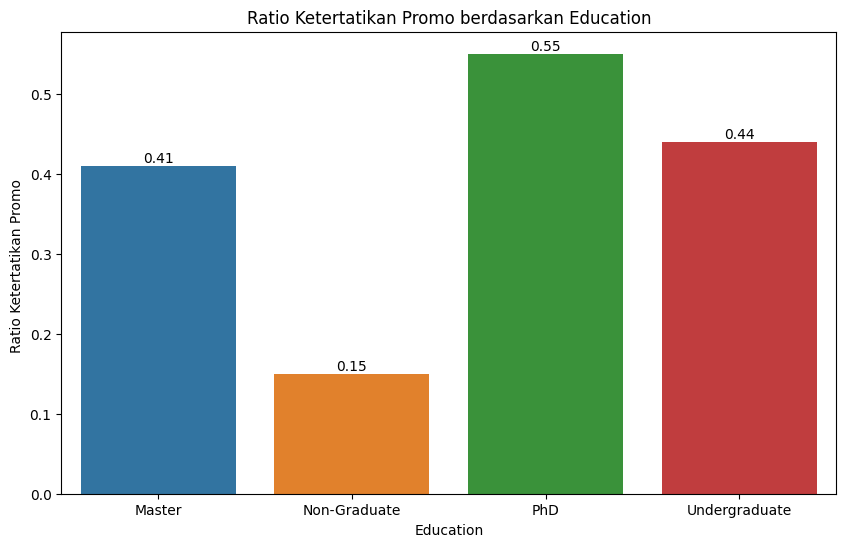

In [648]:
plt.figure(figsize=(10,6))
plot=sns.barplot(data=dfbyEducation2,x='Education',y='Ratio_Campaign_Taken')
plt.title('Ratio Ketertatikan Promo berdasarkan Education')
plt.ylabel('Ratio Ketertatikan Promo ')
plot.bar_label(plot.containers[0],label_type='edge')
plt.xticks(rotation=0)
plt.show()

**Analisis**
- `Customer yang paling banyak mengambil promo adalah customer dengan jenjang pendidikan PhD`. Hal ini diduga karena orang dengan pendidikan PhD memiliki manajemen keuangan lebih baik sehingga mereka ingin memanfaatkan segala diskon yang bisa didapatkan


### Analisis Promo Berdasarkan Marital_Status

Sebelum melihat promo apa yang cocok ditingkatkan, terlebih dahulu kita lihat hubungan antara banyaknya promo yang diambil dan Total Spent dari customer berdasarkan status pernikahan :

In [649]:
# Mencari total pelanggan berdasarkan status pernikahan
df['Marital_Status'].value_counts()

Marital_Status
Married     1443
Single      487 
Divorced    309 
Name: count, dtype: int64

In [650]:
# Melihat pengeluaran orang-orang di supermarket berdasarkan status pernikahan
dfbyMaritalStatus2=df.groupby('Marital_Status')[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].sum()
dfTotalSpentMarital=df[['Total_Spent','Marital_Status']].groupby('Marital_Status',as_index=False).sum()


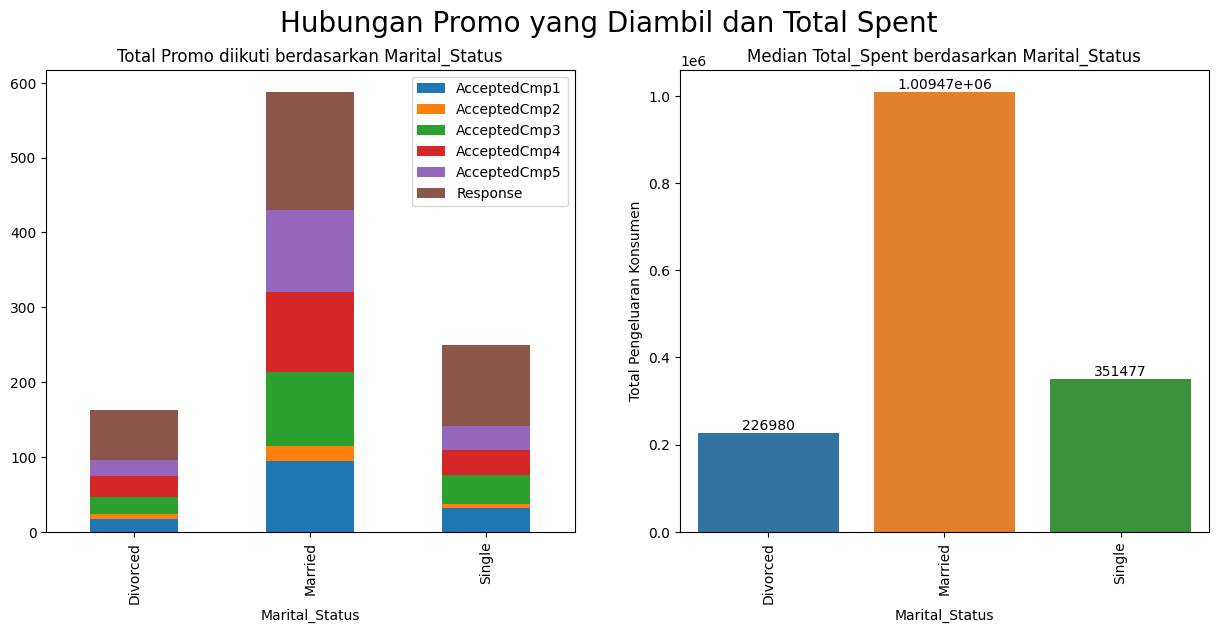

In [651]:
fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(15,6))

plt.suptitle('Hubungan Promo yang Diambil dan Total Spent', size = 20)

dfbyMaritalStatus2.plot(kind='bar', stacked=True,ax=axes[0])
axes[0].set_title('Total Promo diikuti berdasarkan Marital_Status')
plt.ylabel('Total Promo diikuti')
plot.bar_label(plot.containers[0],label_type='edge')
plt.xticks(rotation=90)


axes[1].set_title('Median Total_Spent berdasarkan Marital_Status')
plot2=sns.barplot(data=dfTotalSpentMarital,x='Marital_Status',y='Total_Spent',ax=axes[1])
plt.ylabel('Total Pengeluaran Konsumen')
plot2.bar_label(plot2.containers[0],label_type='edge')
plt.xticks(rotation=90)

plt.show()

**Analisis**

- Berdasarkan Marital Status, dapat dilihat juga bahwa `semakin banyak orang yang mengambil promo, maka total_spentnya juga semakin tinggi`. Hal ini menunjukkan keterkaitan antara jumlah promo yang diambil dan perilaku konsumtif seseorang

Sekarang, mari kita lihat apakah jenis promo sebenarnya mempengaruhi ketertarikan orang menurut status pernikahannya dengan menggunakan Chi-Square test

In [652]:
dfbyMaritalStatus2

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
Marital_Status,,,,,,
Divorced,17,6,24,28,21,67
Married,95,19,100,106,110,158
Single,32,5,39,33,32,109


In [653]:
stat, pvalue, dof, expected = chi2_contingency(dfbyMaritalStatus2)
# conclusion :
if pvalue > 0.05 :
    print(f'''
          pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal menolak Ho.
          Kita TIDAK punya cukup bukti untuk mengatakan bahwa antara Staths Pernikahan dan Promo yang diambil ada keterkaitan (independent)'
          (proporsinya Tidak berbeda signifikan)
          ''')
else :
    print(f'''
          pvalue = {pvalue:.5f}. pvalue <= 0.05. Berhasil menolak Ho.
          Kita punya cukup bukti untuk mengatakan bahwa antara Staths Pernikahan dan Promo yang diambil ada keterkaitan (dependent)
          (proporsinya berbeda signifikan)
          ''')


          pvalue = 0.00058. pvalue <= 0.05. Berhasil menolak Ho.
          Kita punya cukup bukti untuk mengatakan bahwa antara Staths Pernikahan dan Promo yang diambil ada keterkaitan (dependent)
          (proporsinya berbeda signifikan)
          


Dari sini kita melihat bahwa ada keterkaitan antara jenis promo yang diikuti oleh seseorang terhadap status pernikahannya. Sekarang, kita akan coba amati seberapa tertarik orang-orang pada kampanye yang sudah diadakan dengan melihat ratio total_kampanye_yang_diikuti/pelanggan berdasarkan status pernikahannya :

In [654]:
dfbyMaritalStatus2['Total_Response'] = dfbyMaritalStatus2.sum(axis=1)
dfbyMaritalStatus2['n_customer'] = df['Marital_Status'].value_counts()
dfbyMaritalStatus2['Ratio_Campaign_Taken'] = (dfbyMaritalStatus2['Total_Response']/dfbyMaritalStatus2['n_customer']).round(2)
dfbyMaritalStatus2=dfbyMaritalStatus2.reset_index()
dfbyMaritalStatus2

,Marital_Status,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Total_Response,n_customer,Ratio_Campaign_Taken
0,Divorced,17,6,24,28,21,67,163,309,0.53
1,Married,95,19,100,106,110,158,588,1443,0.41
2,Single,32,5,39,33,32,109,250,487,0.51


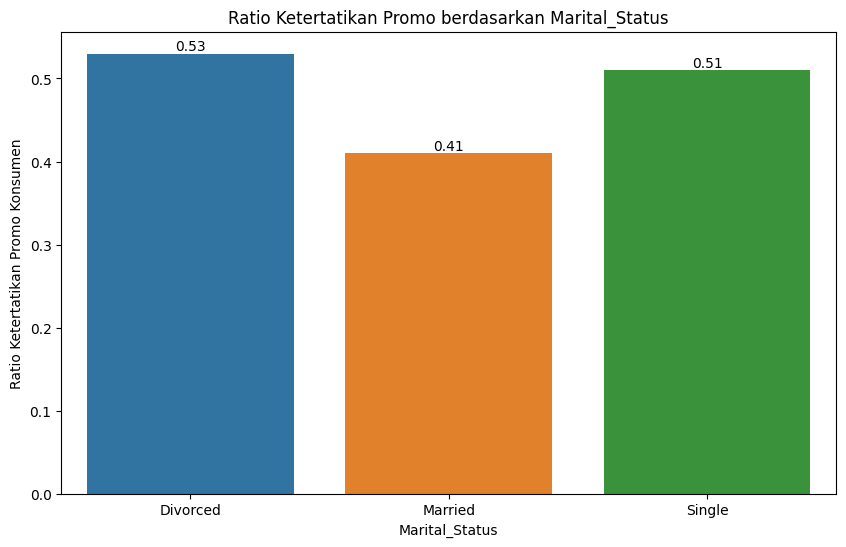

In [655]:
plt.figure(figsize=(10,6))
plot=sns.barplot(data=dfbyMaritalStatus2,x='Marital_Status',y='Ratio_Campaign_Taken')
plt.title('Ratio Ketertatikan Promo berdasarkan Marital_Status')
plt.ylabel('Ratio Ketertatikan Promo Konsumen')
plot.bar_label(plot.containers[0],label_type='edge')
plt.xticks(rotation=0)
plt.show()

**Analisis**
- `Customer yang paling banyak mengambil promo adalah customer dengan status bercerai`. Hal ini diduga karena orang yang sudah bercerai memiliki kondisi ekonomi yang cukup sulit sehingga mereka ingin memanfaatkan segala diskon yang bisa didapatkan


### Analisis Promo Berdasarkan People_Home

Sebelum melihat promo apa yang cocok ditingkatkan, terlebih dahulu kita lihat hubungan antara banyaknya promo yang diambil dan Total Spent dari customer berdasarkan jumlah orang dirumahnya :

In [656]:
# Mencari total pelanggan berdasarkan Jumlah orang dirumah
df['People_Home'].value_counts()

People_Home
3    888
2    764
4    301
1    254
5    32 
Name: count, dtype: int64

In [657]:
# Melihat pengeluaran orang-orang di supermarket berdasarkan Jumlah orang dirumah
dfbyTotalPeople=df.groupby('People_Home')[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].sum()
dfTotalSpentPeople=df[['Total_Spent','People_Home']].groupby('People_Home',as_index=False).sum()

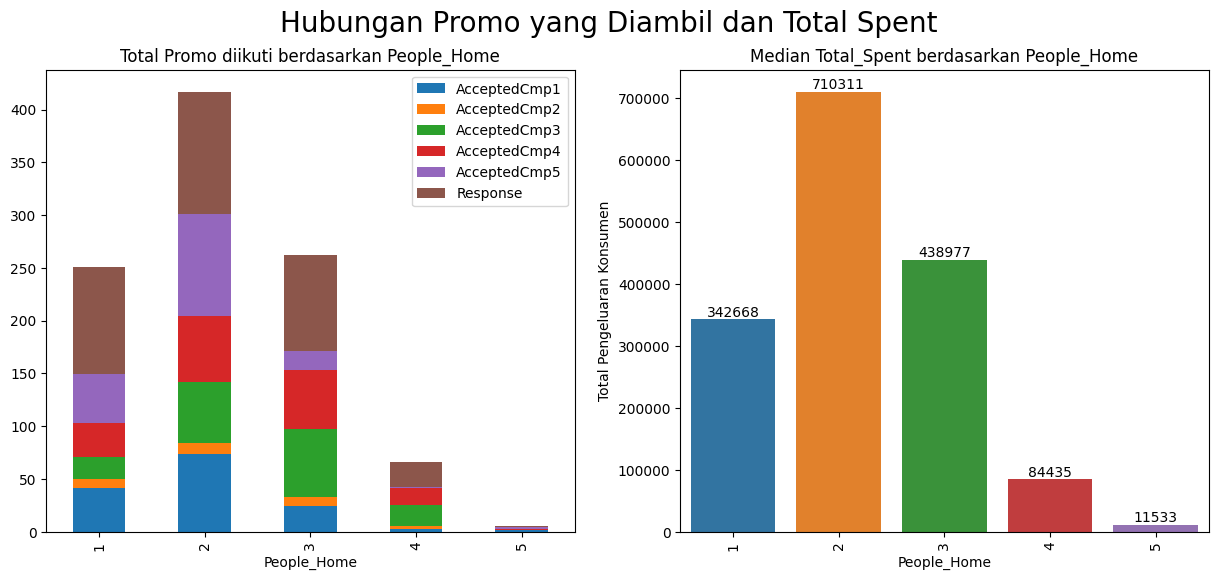

In [658]:
fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(15,6))

plt.suptitle('Hubungan Promo yang Diambil dan Total Spent', size = 20)

dfbyTotalPeople.plot(kind='bar', stacked=True,ax=axes[0])
axes[0].set_title('Total Promo diikuti berdasarkan People_Home')
plt.ylabel('Total Promo diikuti')
plot.bar_label(plot.containers[0],label_type='edge')
plt.xticks(rotation=90)


axes[1].set_title('Median Total_Spent berdasarkan People_Home')
plot2=sns.barplot(data=dfTotalSpentPeople,x='People_Home',y='Total_Spent',ax=axes[1])
plt.ylabel('Total Pengeluaran Konsumen')
plot2.bar_label(plot2.containers[0],label_type='edge')
plt.xticks(rotation=90)

plt.show()

**Analisis**

- Berdasarkan People_Home, dapat dilihat juga bahwa `semakin banyak orang yang mengambil promo, maka total_spentnya juga semakin tinggi`. Hal ini menunjukkan keterkaitan antara jumlah promo yang diambil dan perilaku konsumtif seseorang

Sekarang, mari kita lihat apakah jenis promo sebenarnya mempengaruhi ketertarikan orang berdasarkan jumlah orang dirumahnya dengan menggunakan Chi-Square test

In [659]:
dfbyTotalPeople

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
People_Home,,,,,,
1,41,9,21,32,46,102
2,74,10,58,62,97,116
3,24,9,64,56,18,91
4,3,2,20,16,1,24
5,2,0,0,1,1,1


In [660]:
stat, pvalue, dof, expected = chi2_contingency(dfbyTotalPeople)
# conclusion :
if pvalue > 0.05 :
    print(f'''
          pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal menolak Ho.
          Kita TIDAK punya cukup bukti untuk mengatakan bahwa antara Jumlah Orang Dirumah dan Promo yang diambil ada keterkaitan (independent)'
          (proporsinya Tidak berbeda signifikan)
          ''')
else :
    print(f'''
          pvalue = {pvalue:.5f}. pvalue <= 0.05. Berhasil menolak Ho.
          Kita punya cukup bukti untuk mengatakan bahwa antara Jumlah Orang Dirumah dan Promo yang diambil ada keterkaitan (dependent)
          (proporsinya berbeda signifikan)
          ''')



          pvalue = 0.00000. pvalue <= 0.05. Berhasil menolak Ho.
          Kita punya cukup bukti untuk mengatakan bahwa antara Jumlah Orang Dirumah dan Promo yang diambil ada keterkaitan (dependent)
          (proporsinya berbeda signifikan)
          


Dari sini kita melihat bahwa ada keterkaitan antara jenis promo yang diikuti oleh seseorang terhadap jumlah orang dirumahnya. Sekarang, kita akan coba amati seberapa tertarik orang-orang pada kampanye yang sudah diadakan dengan melihat ratio total_kampanye_yang_diikuti/pelanggan berdasarkan jumlah orang dirumahnya :

In [661]:
dfbyTotalPeople['Total_Response'] = dfbyTotalPeople.sum(axis=1)
dfbyTotalPeople['n_customer'] = df['People_Home'].value_counts()
dfbyTotalPeople['Ratio_Campaign_Taken'] = (dfbyTotalPeople['Total_Response']/dfbyTotalPeople['n_customer']).round(2)
dfbyTotalPeople=dfbyTotalPeople.reset_index()
dfbyTotalPeople

,People_Home,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Total_Response,n_customer,Ratio_Campaign_Taken
0,1,41,9,21,32,46,102,251,254,0.99
1,2,74,10,58,62,97,116,417,764,0.55
2,3,24,9,64,56,18,91,262,888,0.30
3,4,3,2,20,16,1,24,66,301,0.22
4,5,2,0,0,1,1,1,5,32,0.16


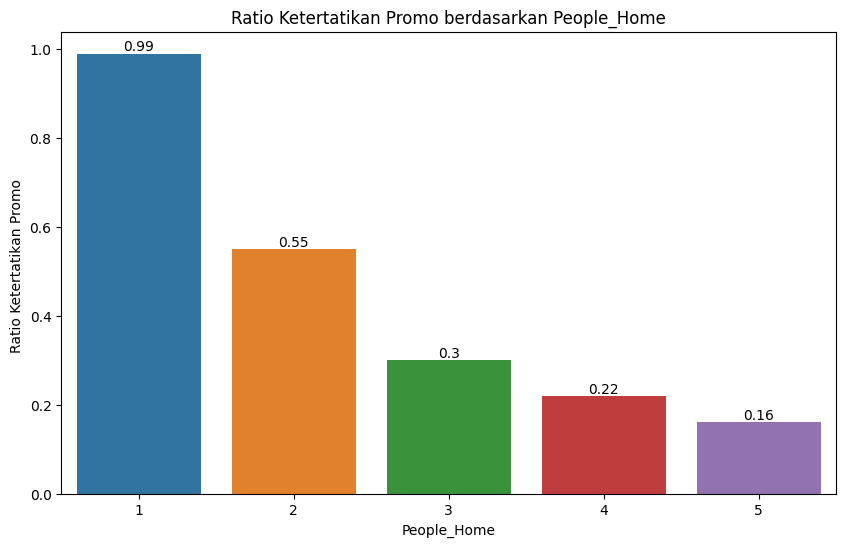

In [662]:
plt.figure(figsize=(10,6))
plot=sns.barplot(data=dfbyTotalPeople,x='People_Home',y='Ratio_Campaign_Taken')
plt.title('Ratio Ketertatikan Promo berdasarkan People_Home')
plt.ylabel('Ratio Ketertatikan Promo ')
plot.bar_label(plot.containers[0],label_type='edge')
plt.xticks(rotation=0)
plt.show()

**Analisis**
- `Customer yang paling banyak mengambil promo adalah customer yang hanya memiliki 1 orang dirumahnya`. Nilai 0.99 menunjukkan semua pelanggan simple paling tidak mengambil 1 promo selama 2 tahun terakhir. Padahal seharusnya, orang-orang yang lebih membutuhkan promo adalah orang-orang yang memiliki banyak anggota dirumahnya. Sebaiknya kedepannya menggunakan promo bundling agar orang-orang yang memiliki banyak anggota dirumahnya menjadi lebih tertarik

### **Hubungan Antara Transaksi Saat Diskon Dan Total_Spent**

Sekarang, mari kita lihat seberapa berpengaruh jumlah transaksi saat discount terhadap jumlah pengeluarannya :

In [663]:
df[['Promo_Taken','NumDealsPurchases']].corr(method='spearman')

,Promo_Taken,NumDealsPurchases
Promo_Taken,1.00000,-0.09235
NumDealsPurchases,-0.09235,1.00000


<Axes: xlabel='Total_Spent', ylabel='NumDealsPurchases'>

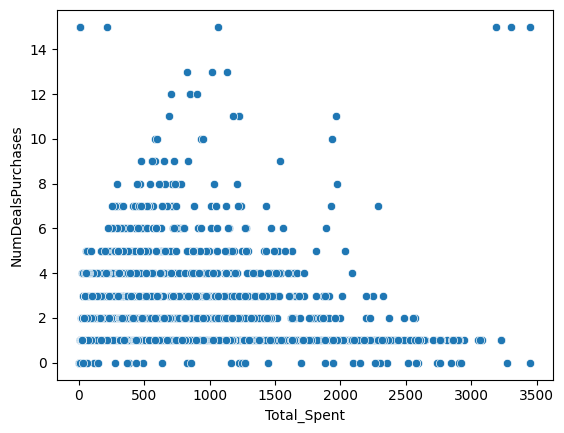

In [664]:
sns.scatterplot(data=df,x='Total_Spent',y='NumDealsPurchases')

**Analisis**

- Sekilas dari data diatas, `tidak terlihat hubungan yang signifikan antara jumlah transaksi saat diskon dengan total pengeluaran customer`

### **Analisis Berdasarkan Waktu Pendaftaran**

In [665]:
# Membuat dataframe baru terkait waktu pendaftaran
dfTime=df[['ID','Dt_Customer']].copy()
dfTime['Bulan'] = df['Dt_Customer'].dt.month_name()
dfTime

,ID,Dt_Customer,Bulan
0,5524,2012-09-04,September
1,2174,2014-03-08,March
2,4141,2013-08-21,August
3,6182,2014-02-10,February
4,5324,2014-01-19,January
...,...,...,...
2235,10870,2013-06-13,June
2236,4001,2014-06-10,June
2237,7270,2014-01-25,January
2238,8235,2014-01-24,January


In [666]:
dfTimeGrouped = dfTime[['Bulan','ID']].groupby('Bulan',as_index=False).count().reindex([4,3,7,0,8,6,5,1,11,10,9,2])
dfTimeGrouped

,Bulan,ID
4,January,197
3,February,178
7,March,211
0,April,182
8,May,216
6,June,165
5,July,101
1,August,222
11,September,193
10,October,212


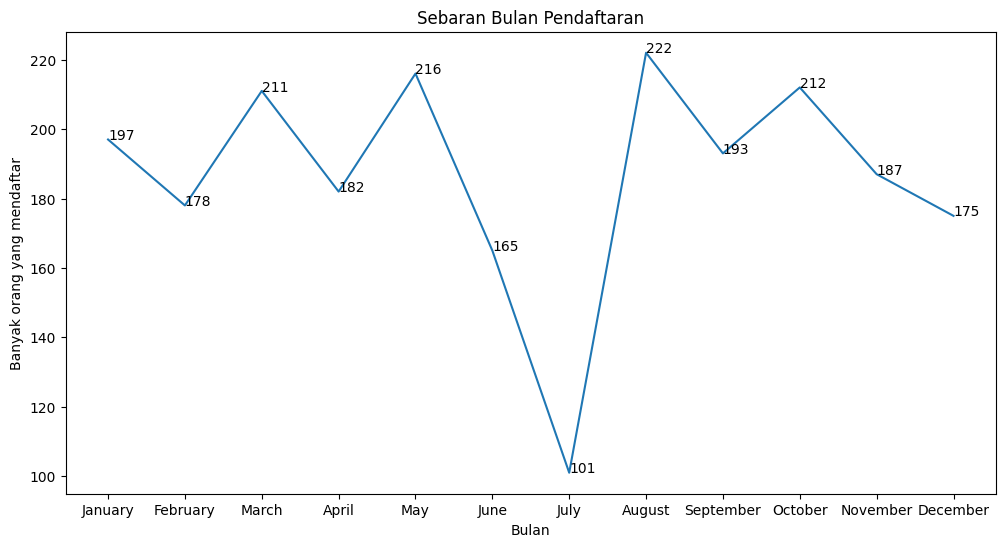

In [667]:
# Membuat visualisasi waktu pendaftaran terhadap jumlah orang yang mendaftar
plt.figure(figsize=(12,6))
sns.lineplot(data=dfTimeGrouped,x='Bulan',y='ID')
for x, y in zip(dfTimeGrouped['Bulan'], dfTimeGrouped['ID']):
    plt.text(x = x, # x-coordinate position of data label
    y = y, s = '{:.0f}'.format(y)) # y-coordinate position of data label, adjusted to be 150 below the data point
plt.title('Sebaran Bulan Pendaftaran')
plt.ylabel('Banyak orang yang mendaftar')
plt.xticks(rotation=0)
plt.show()

**Analisis**

- Dari sini dapat dilihat bahwa `pendaftaran paling banyak dilakukan pada bulan Agustus dan May`. Oleh karena itu dianjurkan membuat promo pada bulan agustus ataupun may
- `Bulan Juli merupakan Bulan yang paling sedikit mendapatkan pendaftar baru` sehingga disarankan untuk tidak membuat promo pada bulan tersebut

# **Analisis Tempat Pembelian**

Selanjutnya akan dilakukan analisis seberapa efektif Tempat Pembelian yang disediakan dan bagaimana respon pelanggan untuk setiap tempat pembelian tersebut

### **Banyaknya Transaksi yang Dilakukan di Tiap Tempat Pembelian**

In [668]:
TempatPembelian=df[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum()
dfTempatPembelian=pd.DataFrame(TempatPembelian).reset_index().rename(columns={'index' : 'Tempat_Pembelian', 0 : 'Banyak_Transaksi'}).sort_values(by='Banyak_Transaksi',ascending=False)
dfTempatPembelian['Total_Transaksi'] = dfTempatPembelian['Banyak_Transaksi'].sum()
dfTempatPembelian['Persentase']=(dfTempatPembelian['Banyak_Transaksi']/dfTempatPembelian['Total_Transaksi']).round(3)*100
dfTempatPembelian

,Tempat_Pembelian,Banyak_Transaksi,Total_Transaksi,Persentase
2,NumStorePurchases,12967,28076,46.2
0,NumWebPurchases,9147,28076,32.6
1,NumCatalogPurchases,5962,28076,21.2


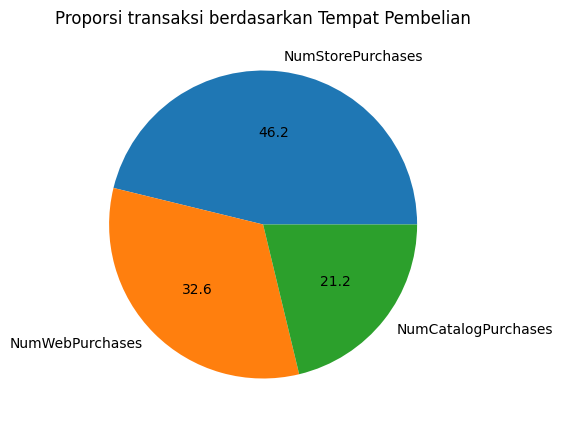

In [669]:
plt.figure(figsize=(12,5))
plt.pie(
    x= dfTempatPembelian['Banyak_Transaksi'], # isi dengan kolom numerikal
    labels= dfTempatPembelian['Tempat_Pembelian'], # isi dengan kolom kategorikal
    autopct = f'%.1f', # untuk menampilkan persentasi
)

plt.title('Proporsi transaksi berdasarkan Tempat Pembelian')
plt.show()


**Analisis**

Dari sini, dapat dilihat bahwa `mayoritas orang-orang berbelanja di toko`, kemudian berbelanja di web, dan kemudian berbelanja lewat katalog

Sekarang kita akan coba melihat, ada berapa banyak total spent dari customer yang paling banyak berbelanja di Toko, kemudian di Catalog, dan kemudian di Web

In [670]:
# Membagi total spent proportional dengan categorynya
# Disini, Proportional Spent dihitung berdasarkan proporsi pembelian pada tempat tertentu dengan rumus Jumlah Transaksi di Tempat Terbanyak dibagikan dengan Jumlah Transaksi diseluruh tempat * Total_Spent
df1=df[['Total_Spent','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']][(df['NumWebPurchases']>df['NumCatalogPurchases']) & (df['NumWebPurchases']>df['NumStorePurchases'])]
df1['Proportional_Spent'] = (df['Total_Spent'] * (df['NumWebPurchases']/(df['NumStorePurchases']+df['NumCatalogPurchases']+df['NumWebPurchases']))).round(0)
df1['Category']='Web'
df2=df[['Total_Spent','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']][(df['NumCatalogPurchases']>df['NumWebPurchases']) & (df['NumCatalogPurchases']>df['NumStorePurchases'])]
df2['Proportional_Spent'] = (df['Total_Spent'] * (df['NumCatalogPurchases']/(df['NumStorePurchases']+df['NumCatalogPurchases']+df['NumWebPurchases']))).round(0)
df2['Category']='Catalog'
df3=df[['Total_Spent','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']][(df['NumStorePurchases']>df['NumCatalogPurchases']) & (df['NumStorePurchases']>df['NumWebPurchases'])]
df3['Proportional_Spent'] = (df['Total_Spent'] * (df['NumStorePurchases']/(df['NumStorePurchases']+df['NumCatalogPurchases']+df['NumWebPurchases']))).round(0)
df3['Category']='Store'
dfbyTempatPembelianv2 = pd.concat([df1,df2,df3])
dfbyTempatPembelianv2

,Total_Spent,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Proportional_Spent,Category
8,67,3,0,2,40.0,Web
9,54,1,0,0,54.0,Web
13,358,6,1,5,179.0,Web
18,2200,11,4,9,1008.0,Web
24,429,7,1,5,231.0,Web
...,...,...,...,...,...,...
2232,24,0,0,3,24.0,Store
2234,28,1,0,2,19.0,Store
2237,1378,2,3,13,995.0,Store
2238,947,6,5,10,451.0,Store


Sebelum melakukan analisis lebih lanjut, kita akan coba melihat apakah transaksi yang berasal dari Web, Store, dan Katalog memiliki perbedaan yang sifnifikan atau tidak dengan menggunakan Kruskal Walis Test

In [671]:
stat, pvalue = kruskal(
    dfbyTempatPembelianv2[dfbyTempatPembelianv2['Category']=='Web']['Proportional_Spent'],
    dfbyTempatPembelianv2[dfbyTempatPembelianv2['Category']=='Catalog']['Proportional_Spent'],
    dfbyTempatPembelianv2[dfbyTempatPembelianv2['Category']=='Store']['Proportional_Spent']
)
# conclusion :
if pvalue > 0.05 :
    print(f'''
          pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal menolak Ho.
          Kita TIDAK punya cukup bukti untuk mengatakan bahwa minimal salah satu tempat pembelian ada yang median Total Spentnya berbeda
          ''')
else :
    print(f'''
          pvalue = {pvalue:.5f}. pvalue <= 0.05. Berhasil menolak Ho.
          Kita punya cukup bukti untuk mengatakan bahwa minimal salah satu tempat pembelian ada yang median Proportional Spentnya berbeda
          ''')


          pvalue = 0.00000. pvalue <= 0.05. Berhasil menolak Ho.
          Kita punya cukup bukti untuk mengatakan bahwa minimal salah satu tempat pembelian ada yang median Proportional Spentnya berbeda
          


Dari sini kita dapat melihat bahwa Pembelian produk berdasarkan tempat pembelian memiliki nilai yang berbeda secara signifikan, untuk lebih jelasnya akan kita visualisasikan sebagai berikut :

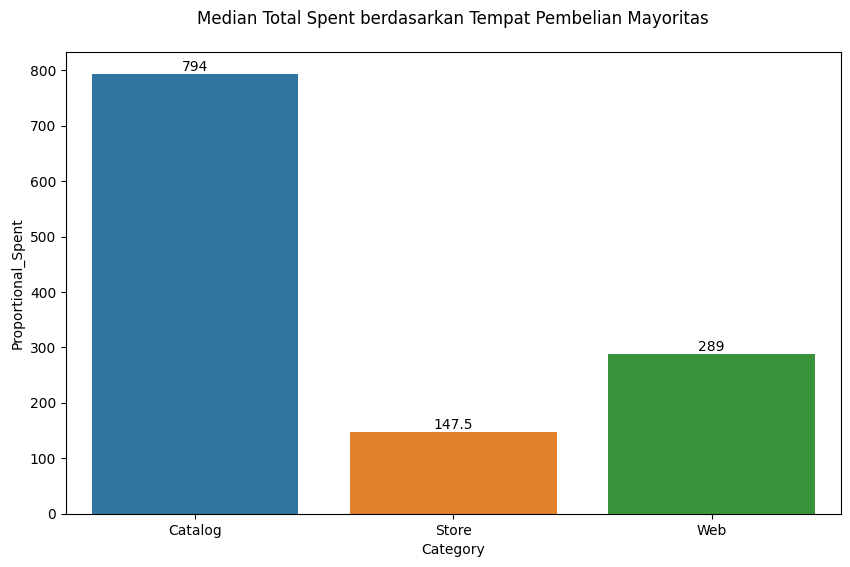

In [672]:
plt.figure(figsize=(10,6))
dfTotalpertempatPembelian=dfbyTempatPembelianv2.groupby('Category',as_index=False).median()
plot=sns.barplot(data=dfTotalpertempatPembelian,x='Category',y='Proportional_Spent')
plot.bar_label(plot.containers[0],label_type='edge')
plt.title('Median Total Spent berdasarkan Tempat Pembelian Mayoritas',pad=20)
plt.show()

**Analisis**

- Dari sini dapat dilihat bahwa yang memiliki `median pembelian produk paling besar adalah customer yang membeli lewat katalog`. Hal ini diduga karena pihak-pihak yang membeli lewat katalog membaca keseluruhan produk sehingga cendrung membeli lebih banyak
- Median pembelian lewat toko langsung cendrung lebih sedikit dari dua tempat lainnya, meskipun secara kumulatif, pembelian paling banyak terjadi di store.

### **Analisis Efektivitas Website**

In [673]:
TransaksiWebsite = df['NumWebPurchases'].sum()
visitwebsite=df['NumWebVisitsMonth'].sum()
dfWebsite = pd.DataFrame({
    'Visit_Website' : [visitwebsite],
    'Transaksi_Website' : [TransaksiWebsite]
})
dfWebsite=dfWebsite.T.reset_index().rename(columns={'index' : 'Category', 0 : 'Jumlah'})
dfWebsite

,Category,Jumlah
0,Visit_Website,11903
1,Transaksi_Website,9147


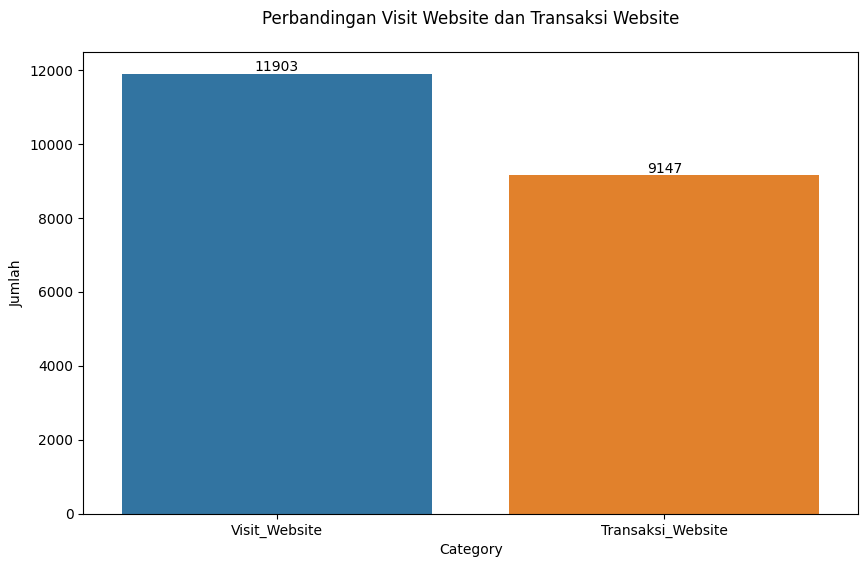

In [674]:
plt.figure(figsize=(10,6))
plot=sns.barplot(data=dfWebsite,x='Category',y='Jumlah')
plot.bar_label(plot.containers[0],label_type='edge')
plt.title('Perbandingan Visit Website dan Transaksi Website',pad=20)
plt.show()

In [675]:
Persentase_Transaksi = TransaksiWebsite/visitwebsite.round(3)*100
Persentase_Transaksi

76.84617323363858

**Analysis**

Dari sini dapat dilihat bahwa persentase transaksi yang terjadi dibandingkan jumlah visit pada website adalah `76.8% yang sudah menunjukkan angka yang cukup bagus`

# **Analisis Top 10% Customer dan Analisis Recency**

Sekarang akan dilakukan analisis untuk 100 Customer yang memiliki Total_Spent paling tinggi, kemudian akan dilihat Recencynya agar kita tidak lost track terhadap pelanggan yang sudah banyak berbelanja di supermarket kita

In [676]:
df.shape[0]

2239

Terdapat 2239 Customer yang berbelanja dalam 2 tahun terakhir

### **Perbandingan Top 10% Customer dengan Customer lainnya**

In [677]:
# Memfilter Top 10% Customer (224 Customer teratas berdasarkan banyak belanjanya di supermarket)
dfTop10percent = df.sort_values(by='Total_Spent',ascending=False).head(224)
dfTop10percent

,ID,Year_Birth,Age,Age_Range,Education,Marital_Status,Income,Kidhome,Teenhome,People_Home,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,Total_Spent,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Promo_Taken
1653,4931,1977,37,36 - 45,Undergraduate,Married,157146.0,0,0,2,2013-04-29,13,1,0,1725,2,1,3453,1,0,0,28,0,1,0,0,0,0,0,0,3,11,0,0
21,5376,1979,35,25 - 35,Undergraduate,Married,2447.0,1,0,3,2013-01-06,42,1,1,1725,1,1,3453,1,15,0,28,0,1,0,0,0,0,0,0,3,11,0,0
687,1501,1982,32,25 - 35,PhD,Married,160803.0,0,0,2,2012-08-04,21,55,16,1622,17,3,3306,4,15,0,28,1,0,0,0,0,0,0,0,3,11,0,0
2228,8720,1978,36,36 - 45,Master,Married,44239.0,0,0,2,2012-08-12,53,32,2,1607,12,4,3272,22,0,0,0,1,0,0,1,0,0,0,0,3,11,0,1
1179,5735,1991,23,15 - 25,Master,Single,90638.0,0,0,1,2014-02-13,29,1156,120,915,94,144,3226,96,1,3,4,10,1,0,0,1,0,0,0,3,11,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056,7441,1973,41,36 - 45,Undergraduate,Divorced,71128.0,1,0,2,2012-10-06,80,958,159,447,20,0,1883,31,3,2,10,12,7,0,0,0,0,0,0,3,11,0,0
1827,5302,1986,28,25 - 35,Undergraduate,Married,78394.0,0,0,2,2013-02-15,13,298,27,697,216,24,1882,166,1,4,6,5,2,0,0,0,0,0,0,3,11,1,1
2167,3520,1990,24,15 - 25,Master,Single,91172.0,0,0,1,2013-03-27,94,162,28,818,0,28,1882,56,0,4,3,7,3,1,0,1,1,1,0,3,11,1,5
2221,7366,1982,32,25 - 35,Master,Single,75777.0,0,0,1,2013-07-04,12,712,26,538,69,13,1881,80,1,3,6,11,1,0,1,1,0,0,0,3,11,1,3


In [678]:
totalTop10percent = dfTop10percent['Total_Spent'].sum()
totalCustomerLain = df['Total_Spent'].sum() - totalTop10percent
dfTotalSpent = pd.DataFrame({
    'Total_Spent_Top10percent' : [totalTop10percent],
    'Total_Spent_NonTop10percent' : [totalCustomerLain]
})
dfTotalSpent=dfTotalSpent.T.reset_index().rename(columns={'index' : 'Category', 0 : 'Total_Spent'})
dfTotalSpent

,Category,Total_Spent
0,Total_Spent_Top10percent,517471
1,Total_Spent_NonTop10percent,1070453


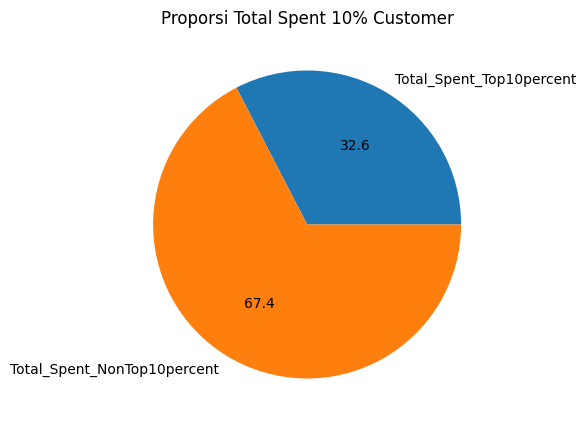

In [679]:
plt.figure(figsize=(10,5))
plt.pie(
    x= dfTotalSpent['Total_Spent'], # isi dengan kolom numerikal
    labels= dfTotalSpent['Category'], # isi dengan kolom kategorikal
    autopct = f'%.1f', # untuk menampilkan persentasi
)

plt.title('Proporsi Total Spent 10% Customer')
plt.show()


**Analisis**

- Dari sini dapat dilihat bahwa `total pembelian dari 10% Customer berkontribusi 32.6% terhadap omset perusahaan`. Oleh karena itu maka customer ini merupakan faktor penting untuk keberlangsungan perusahaan sehingga harus diperhatikan agar tidak lari ke kompetitor. Contohnya adalah dengan memberi Penawaran spesial ataupun penghargaan

### **Analisis Recency dari 10% top customer**

In [680]:
dfTop10percent['Recency'].describe()

count    224.000000
mean     51.241071 
std      29.718483 
min      1.000000  
25%      25.000000 
50%      54.500000 
75%      78.000000 
max      99.000000 
Name: Recency, dtype: float64

In [681]:
# Membuat fungsi untuk pengelompokan recency
def recency(char) :
    if char < 30 :
        return '0 - 1 bulan'
    elif char < 60 :
        return '1 - 2 bulan'
    elif char < 90 :
        return '2 - 3 bulan'
    else :
        return '> 3 bulan'
    
dfTop10percent['Recency_Group'] = dfTop10percent['Recency'].apply(recency)

In [682]:
plt.figure(figsize=(8,5))
dfgrouprecency=dfTop10percent[['Recency_Group','ID']].groupby('Recency_Group',as_index=False).count()
dfgrouprecency

,Recency_Group,ID
0,0 - 1 bulan,66
1,1 - 2 bulan,58
2,2 - 3 bulan,70
3,> 3 bulan,30


<Figure size 800x500 with 0 Axes>

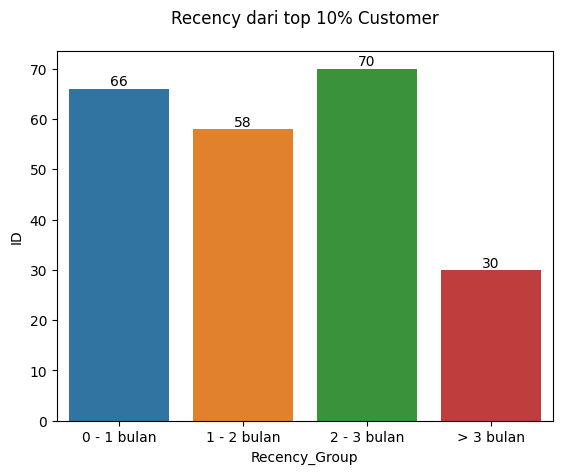

In [683]:
plot=sns.barplot(data=dfgrouprecency,x='Recency_Group',y='ID')
plot.bar_label(plot.containers[0],label_type='edge')
plt.title('Recency dari top 10% Customer',pad=20)
plt.show()

In [684]:
# menghitung persentase customer yang sudah tidak aktif lebih dari 2 bulan
PersentaseCustomerMissing = (dfgrouprecency.iloc[2,1]+dfgrouprecency.iloc[3,1])/dfgrouprecency['ID'].sum()*100
PersentaseCustomerMissing

44.642857142857146

**Analisis**

Dari grafik diatas, terlihat bahwa `sekitar 45% dari Top 10% Customer tidak berbelanja dalam 60 hari terakhir dan bahkan ada yang lebih` yang dimana hal itu sudah cukup lama, oleh karena itu perusahaan harus segera memprioritaskan untuk memberi promo kepada top 10% Customer yang sudah tidak berbelanja selama 60 hari atau lebih. Baru kemudian memberikan promo kepada customer yang memiliki recency 1-2 bulan, kemudian dapat dipertimbangkan untuk memberi promo juga untuk yang recencynya < 1 bulan

### **Profile Top 10% Customer pada Supermarket**

Sekarang kita akan coba melihat orang-orang seperti apa yang masuk kedalam top 10% Customer pada supermarket ini :

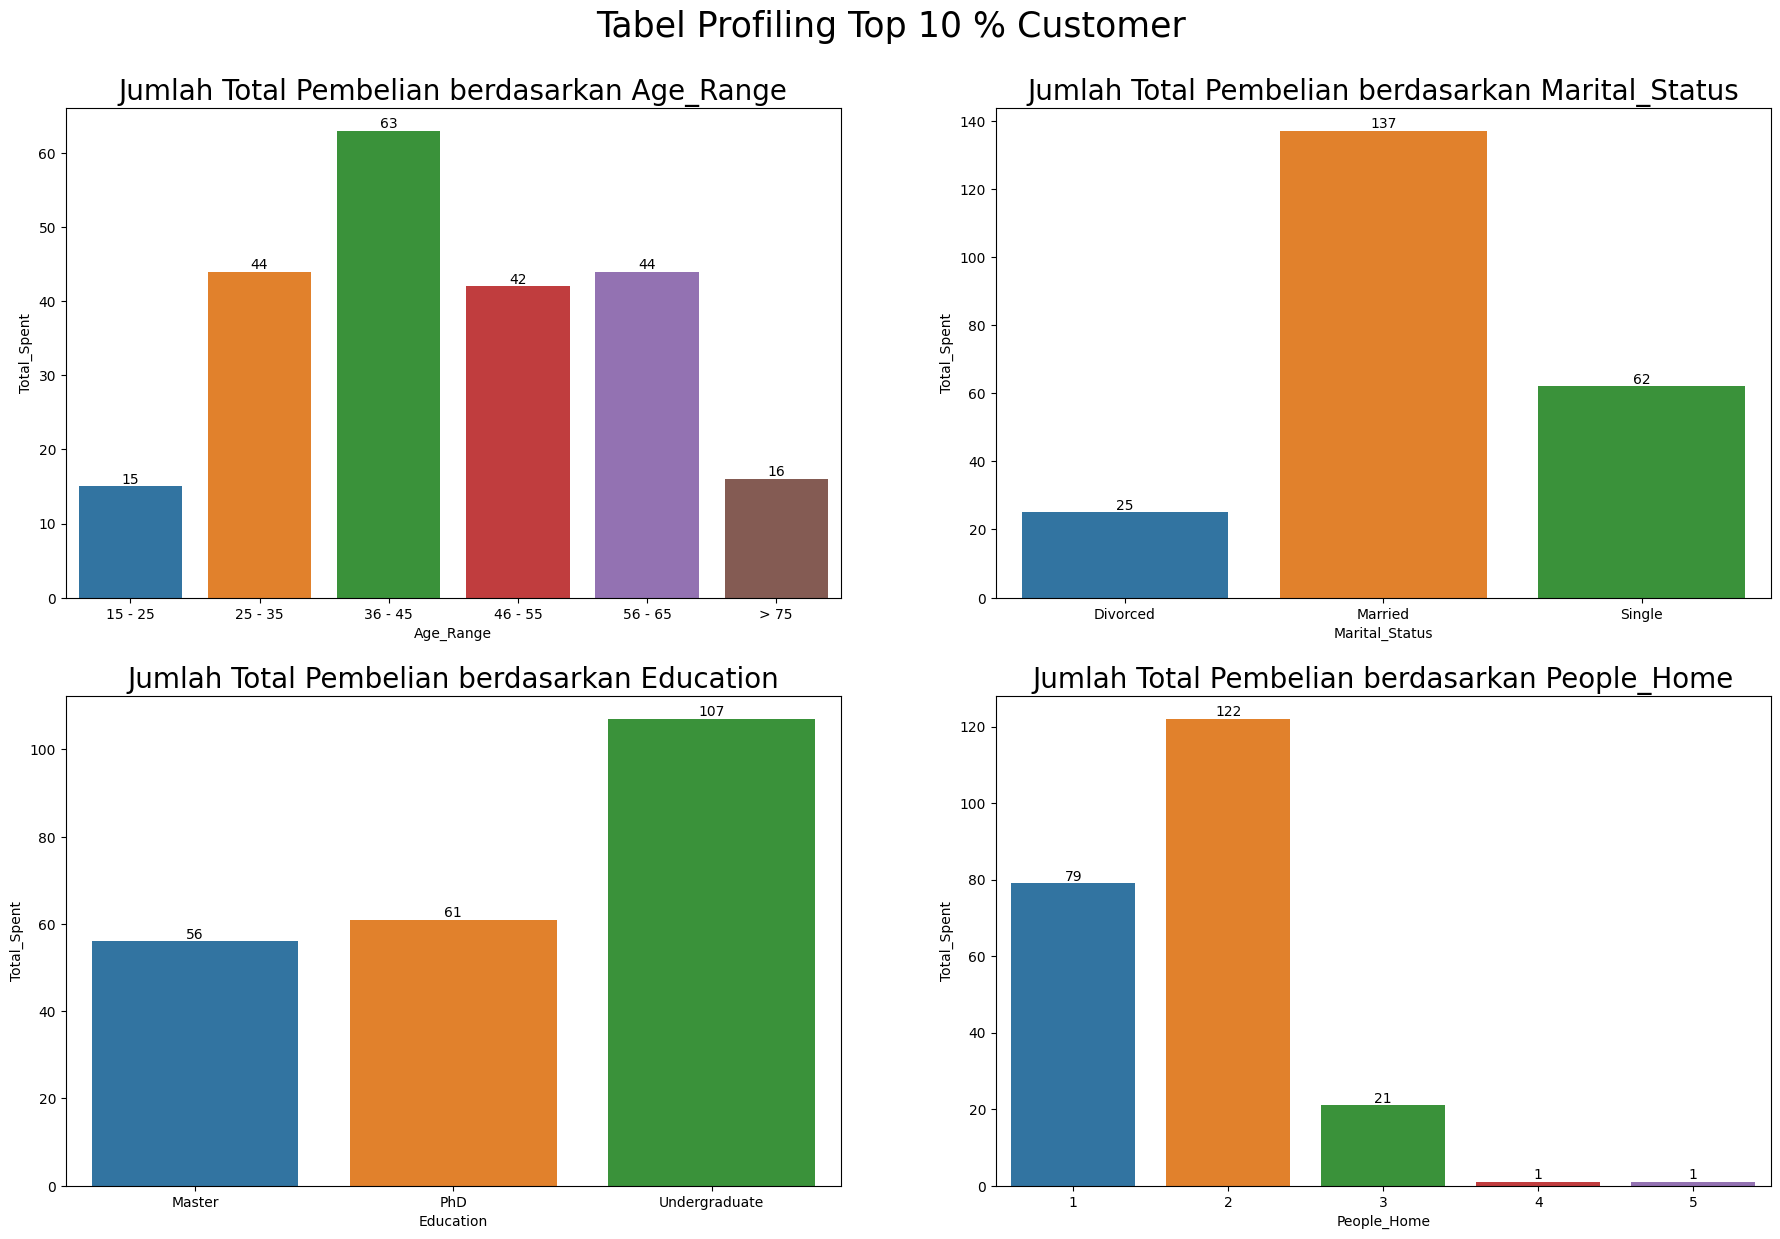

In [685]:
# membuat grafik profiling Top 10% Customer berdasarkan beberapa parameter
listkriteria = ['Age_Range','Marital_Status','Education','People_Home']
kolom=0
n_cols=2
n_rows=2
plt.figure(figsize=(22,14))
for i in range(n_rows) :
    for j in range(n_cols) :
        dfCriteria10percent=dfTop10percent.groupby(listkriteria[kolom],as_index=False)['Total_Spent'].count()
        plt.subplot(n_rows,n_cols,kolom+1)
        plot=sns.barplot(data=dfCriteria10percent, x=listkriteria[kolom], y='Total_Spent')
        plot.bar_label(plot.containers[0],label_type='edge')
        plt.title(f'Jumlah Total Pembelian berdasarkan {listkriteria[kolom]}',size=20)
        kolom+=1

plt.suptitle('Tabel Profiling Top 10 % Customer', size=25, y=0.95)
plt.show()

   

**Analisis**
- Tidak ada orang yang memiliki jenjang pendidikan Non-Graduate (tidak sarjana) yang masuk kedalam Top 10% Customer
- Jika kita melihat secara sekilas, perbandingan profile Top 10% Customer berdasarkan tiap parameter tidak terlalu berbeda jauh dan cenderung hampir seimbang. Tetapim jika kita mengambil nilai tertinggi sebagai acuan, didapatkan kriteria orang-orang yang paling banyak masuk dalam Top 10% Customer adalah :
    - `Umur : 36 - 45 Tahun`
    - `Status Pernikahan : Married`
    - `Pendidikan : UnderGraduate (S1)`
    - `Banyaknya orang dirumah : 2 orang`


Kedepannya, profiling ini dapat digunakan untuk mengidentifikasi calon customer loyal untuk perusahaan

# Kesimpulan dan Rekomendasi 

# Kesimpulan

Dari analisis yang telah dilakukan, kita bisa menjawab permasalahan yang dilontarkan oleh BoD :

1. **Produk seperti apa yang disukai oleh pelanggan dan pelanggan seperti apa yang paling banyak berbelanja?**
    - Secara general, produk yang paling laku adalah wine (untuk hiburan), produk daging (kebutuhan pangan) dan diikuti emas (untuk investasi) dimana ketiga produk berkontribusi sebesar 85% terhadap pendapatan supermarket
    - Produk yang paling sedikit berkontribusi terhadap pendapatan supermarket adalah buah-buahan yaitu hanya 4.3%
    - Orang pada usia tidak produktif lebih konsumtif dibandingkan orang pada usia produktif
    - Orang pada lanjut usia (>75 tahun) cenderung lebih banyak membeli produk ikan, hal itu diduga karena memperhatikan kesehatan
    - Orang dengan status pernikahan bercerai cendrung lebih konsumtif
    - Orang dengan status pernikahan bercerai paling banyak menghabiskan uangnya untuk produk Wine, hal itu diduga karena mereka cendrung lebih stress
    - Orang dengan jenjang pendidikan lebih tinggi memiliki sifat lebih konsumtif
    - Orang pada jenjang pendidikan tidak sarjana lebih mengutamakan kebutuhan investasi dan pangan dan tidak ingin menghabiskan uangnya untuk hiburan (Wine)
    - Orang yang tinggal sendiri dirumahnya menjadi lebih konsumtif
    - Orang yang tinggal sendiri juga cenderung lebih banyak membeli produk ikan
    - Penghasilan berhubungan erat dengan pengeluaran, semakin besar penghasilan seseorang maka pengeluaran juga cendrung semakin besar
    - Secara umum, produk yang dijual dan Customer Service yang dilakukan perusahaan sudah cukup baik karena 99.1% customer tidak mengajukan komplain dalam 2 tahun terakhir

------------------------------------------------------------------
2.  **Bagaimana performa marketing yang dilakukan dan strategi marketing seperti apa yang sebaiknya diterapkan untuk meningkatkan penjualan?**
    - Dari semua parameter, disimpulkan bahwa jumlah promo yang diambil sangat berkaitan dengan total uang yang dibelanjakan oleh customer, sehingga sangat penting untuk melakukan promosi agar penghasilan supermarket dapat bertambah
    - Secara general, promo yang ditawarkan kurang menarik karena hanya 27.2% saja yang mengikuti promo yang telah dibuat selama 6 x 
    - Promo yang paling efektif adalah promo terakhir, dimana promo tersebut memiliki respon 2 x lipat dari promo 3,4,dan 5 
    - Promo yang dilakukan selama ini kurang efektif untuk orang pada usia produktif
    - Promo paling banyak diikuti oleh orang yang memiliki gelar PHD
    - Promo kurang diminati oleh orang yang berstatus menikah
    - Promo paling banyak diikuti oleh orang yang tinggal sendiri, hampir semua pelanggan yang tinggal sendiri pernah mengikuti promo minimal 1 x
    - Pelanggan baru paling banyak mendaftar pada bulan May dan Agustus sedangkan paling sedikit pada bulan Juli

------------------------------------------------------------------
3. **Apakah tempat pembelian yang tersedia sudah cukup efektif? apa yang dapat dilakukan untuk meningkatkan penjualan?**
    - Median pembelian paling besar terjadi saat customer menggunakan katalog. Hal ini diduga karena pihak yang membeli dari katalog merupakan perusahaan juga sehingga hal ini termasuk transaksi B to B (Business to Business)
    - Median pembelian pada store tergolong masih sangat kecil dibandingkan dua tempat pembelian lainnya
    - Persentase transaksi di website terhadap jumlah visit sudah cukup bagus yaitu 76.8%

------------------------------------------------------------------
4. **Siapa yang harus diprioritaskan untuk diberikan perlakuan spesial dari perusahaan agar mereka dapat menjadi pelanggan loyal?**
    - Top 10% Customer berkontribusi 32.6% terhadap pendapatan supermarket
    - Dari Top 10 % Customer, hampir 45 % customer sudah tidak bertransaksi lebih dari 2 bulan
    - Profile Top 10% Customer pada supermarket adalah orang-orang yang memiliki kriteria :
        - Umur : 36 - 45 Tahun
        - Status Pernikahan : Menikah
        - Pendidikan : Undergraduate (S1)
        - Banyaknya orang dirumah : 2 orang


# Rekomendasi

Berdasarkan kesimpulan diatas, diberikan rekomendasi sebagai berikut :
1. Produk dan Perilaku Konsumen
    - Sebaiknya supermarket memperbanyak produk wine, daging, dan emas karena ketiga item itu berkontribusi 85% dari pendapatan perusahaan. Sedangkan perusahaan dapat mempertimbangkan untuk menghapuskan produk buah karena hanya berkontribusi 4.3% terhadap pendapatan perusahaan sedangkan produk tersebut memiliki kadaluarsa yang cepat dan membutuhkan pendingin saat dijual (memerlukan banyak biaya)
    - Usahakan menjual produk yang berkaitan kebutuhan orang di usia produktif
    - Tingkatkan frekuensi penawaran produk Wine untuk customer dengan status pernikahan bercerai
    - Tingkatkan frekuensi penawaran produk ikan ke orang-orang single ataupun yang sudah lanjut usia
    - Tingkatkan frekuensi penawaran produk investasi dan produk pangan ke orang-orang yang tidak sarjana
    - Pertahankan kualitas produk yang dijual dan customer service yang telah dilakukan agar dapat mempertahankan atau bahkan meningkatkan
     kepuasan pelanggan untuk tahun-tahun berikutnya
---------------------------------------------------------------------------------------------------------------------------------------------------
2. Promosi
    - Sebaiknya publikasi kampanye dilakukan dengan lebih gencar lagi karena orang yang mengikuti promo masih sedikit (dibawah 30%)
    - Untuk marketing selanjutnya, sebaiknya menggunakan strategi marketing yang digunakan pada kampanye terakhir
    - Hidari untuk menggunakan strategi marketing pada kampanye kedua
    - Buat promosi yang khusus ditargetkan untuk orang-orang di usia kerja
    - Buat promosi yang khusus ditargetkan untuk orang yang memiliki pasangan (menikah)
    - Buat promosi pada bulan Mei ataupun Agustus, dan hindari mengadakan promo pada bulan Juli untuk mendapatkan exposure maksimum terhadap pelanggan baru
---------------------------------------------------------------------------------------------------------------------------------------------------
3. Tempat Pembelian
    - Perbanyak sosialisasi mengenai katalog ke customer karena pembelian lewat katalog terbukti memiliki jumlah yang lebih besar dibandingkan pembelian dari store ataupun website. Mulai menjajaki model bisnis B to B (Business to Business) melalui katalog untuk ekspansi pasar.
    - Evaluasi dan atur ulang tata letak produk yang dijual di toko, agar semua produk terekspos secara merata dan membuat customer ingin berbelanja lebih banyak karena median pembelian produk lewat store masih tergolong kecil dibandingkan dua tempat lainnya
    - Dorong orang-orang untuk melakukan kunjungan website melalui brosur ataupun kampanye di store karena jumlah persentase transaksi dari website memiliki nilai yang cukup bagus
---------------------------------------------------------------------------------------------------------------------------------------------------
4. Top 10% Customer
    - Berikan Penghargaan ataupun promo spesial kepada top 10% Customer agar mereka merasa spesial dan ingin menjadikan supermarket ini sebagai tempat langganan mereka
    - Berikan promo spesial 'Welcome Back' untuk Top 10% customer yang sudah tidak bertansaksi lebih dari 60 hari. Usahakan untuk selalu berhubungan dengan top 10% Customer dan menanyakan produk apa yang mereka inginkan tapi belum ada di supermarket, sehingga mereka akan lebih merasa dihargai dan akan mau untuk kembali berbelanja dengan rutin di supermarket kita
    - Gunakan profiling Top 10% Customer untuk mengidentifikasi potensial customer loyal pada tahun-tahun berikutnya


Dengan mempersempit target marketing dari supermarket ini, diharapkan analisis ini dapat membantu perusahaan untuk mengevaluasi produk yang dijual, melakukan marketing dengan lebih efisien dan cost-effective, serta menghasilkan peningkatan revenue yang signifikan pada tahun-tahun berikutnya.